<h1><center>Predicting Term Deposit Subscriptions</cenyer></h1>

# Load dataset

In [1]:
# import the libraries needed for exploratory data analysis and cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load and separate dataset properly
data = pd.read_csv('data\\bank-full.csv', sep=";")

In [3]:
# display and analysis dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Dataset Exploration and Analysis

### Get shape of dataset

In [4]:
# identify shape of dataset
shape = data.shape

In [5]:
print("Shape of data set: ", shape)

Shape of data set:  (45211, 17)


### Basic information of dataset

In [6]:
# get basic info about dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Display a summary of numerical columns
print("Summary Statistics:")
summary = data.describe()
summary

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check Null/Missing Values

In [8]:
# get null value count in dataset
null_values = data.isnull().sum()

In [9]:
print("Number of null values :\n", null_values)

Number of null values :
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Check duplicate values

In [10]:
# check duplicate values(row) in dataset
duplicates = data.duplicated().sum()

In [11]:
print("Total number of duplicate values : ", duplicates)

Total number of duplicate values :  0


### Check outliers in dataset

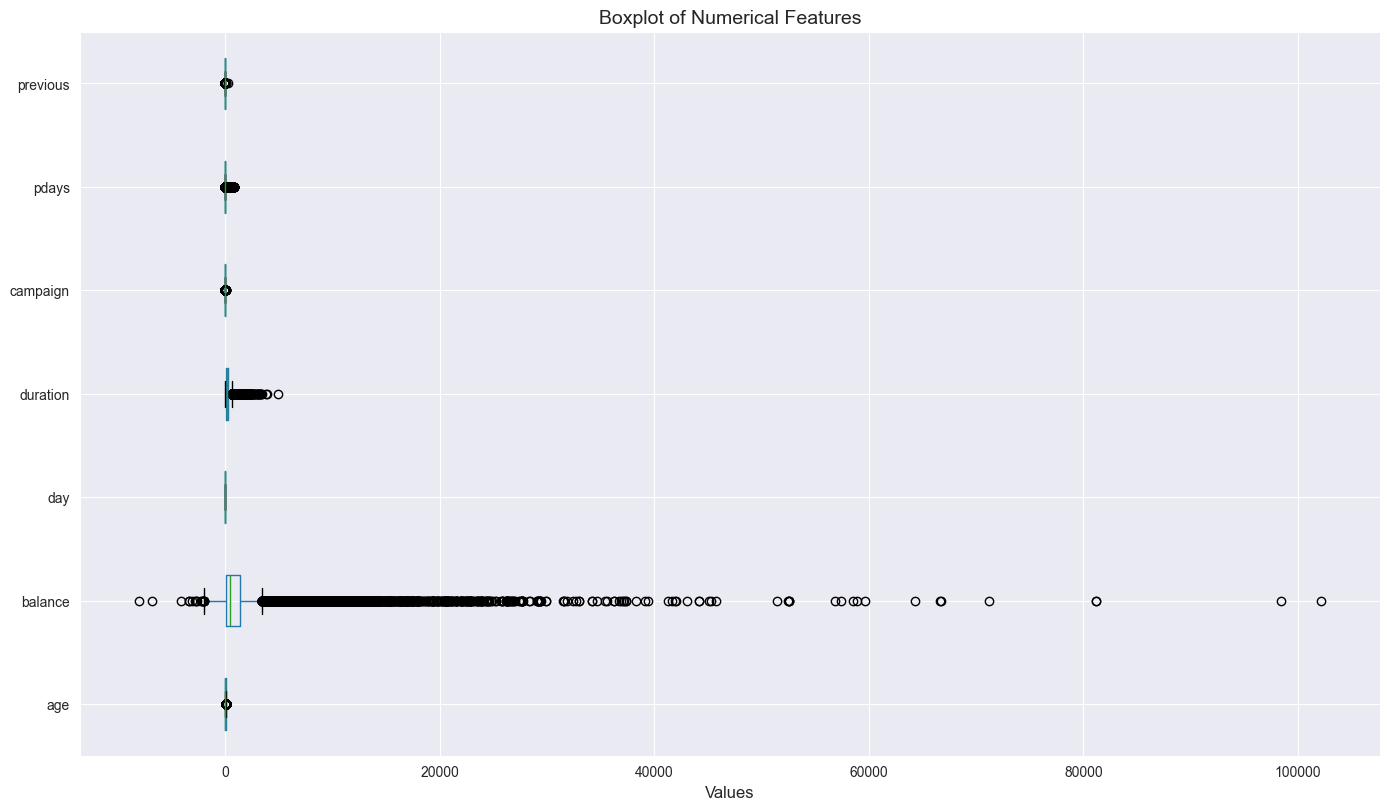

In [12]:
# box-plot for all the numerical columns
plt.figure(figsize=(14, 8))
data.boxplot(vert=False)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.tight_layout()
plt.xlabel("Values", fontsize=12)
plt.show()

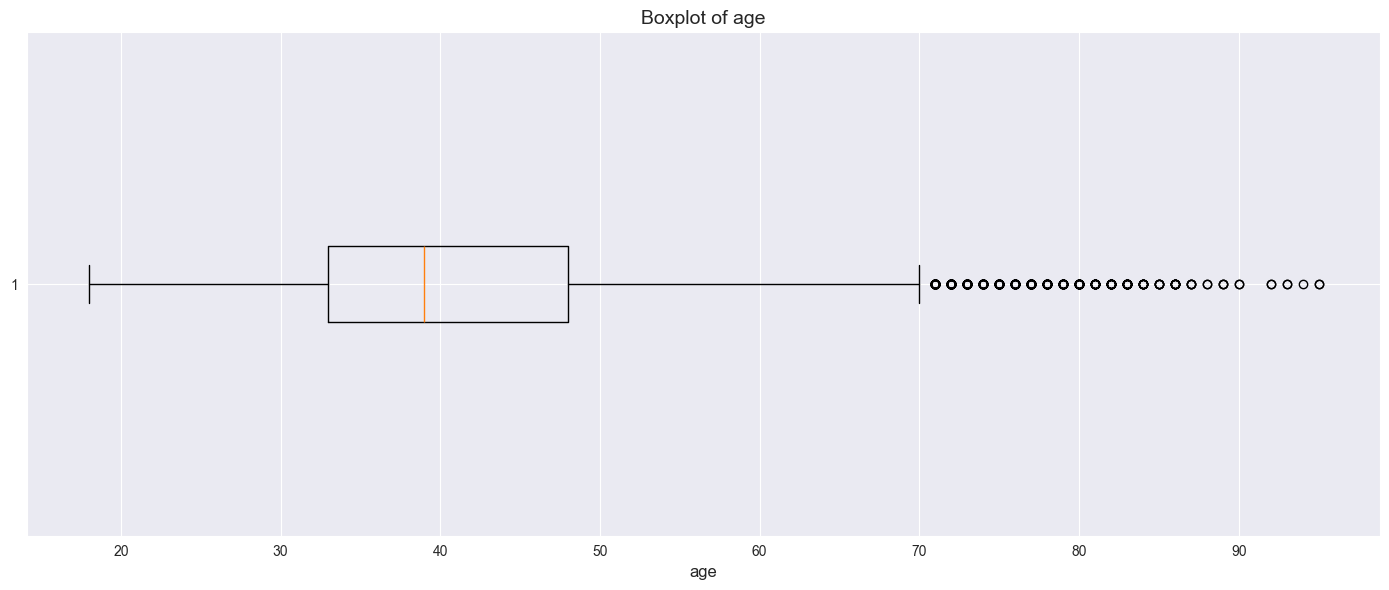

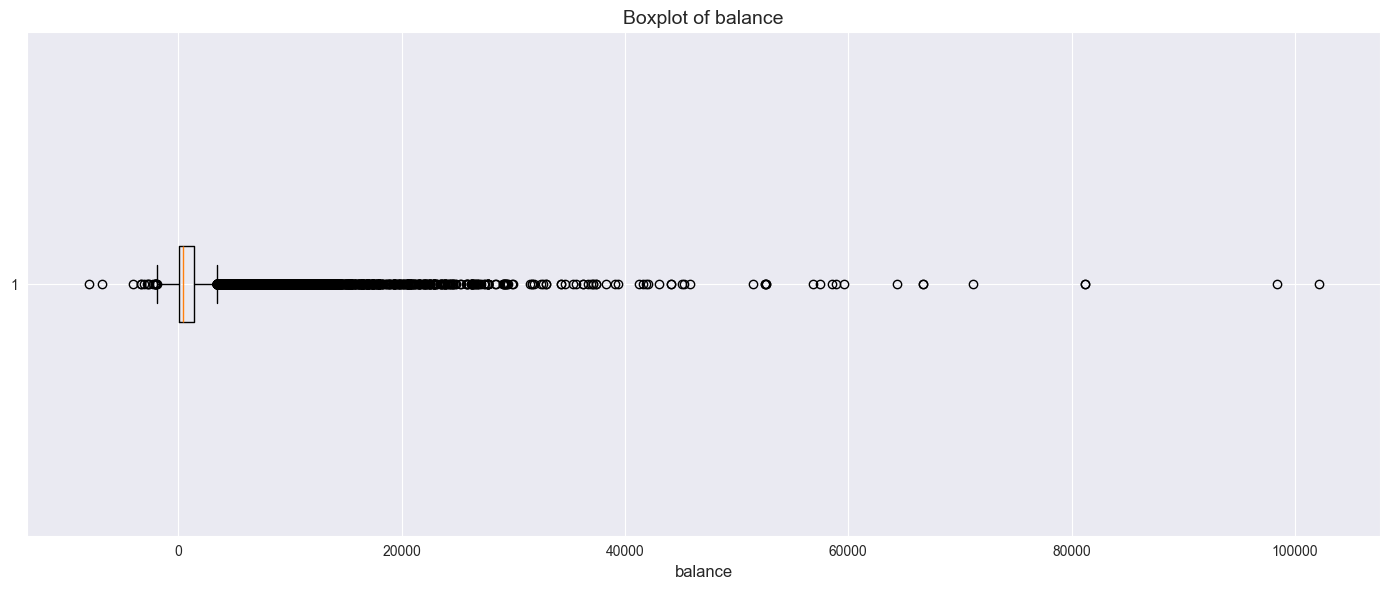

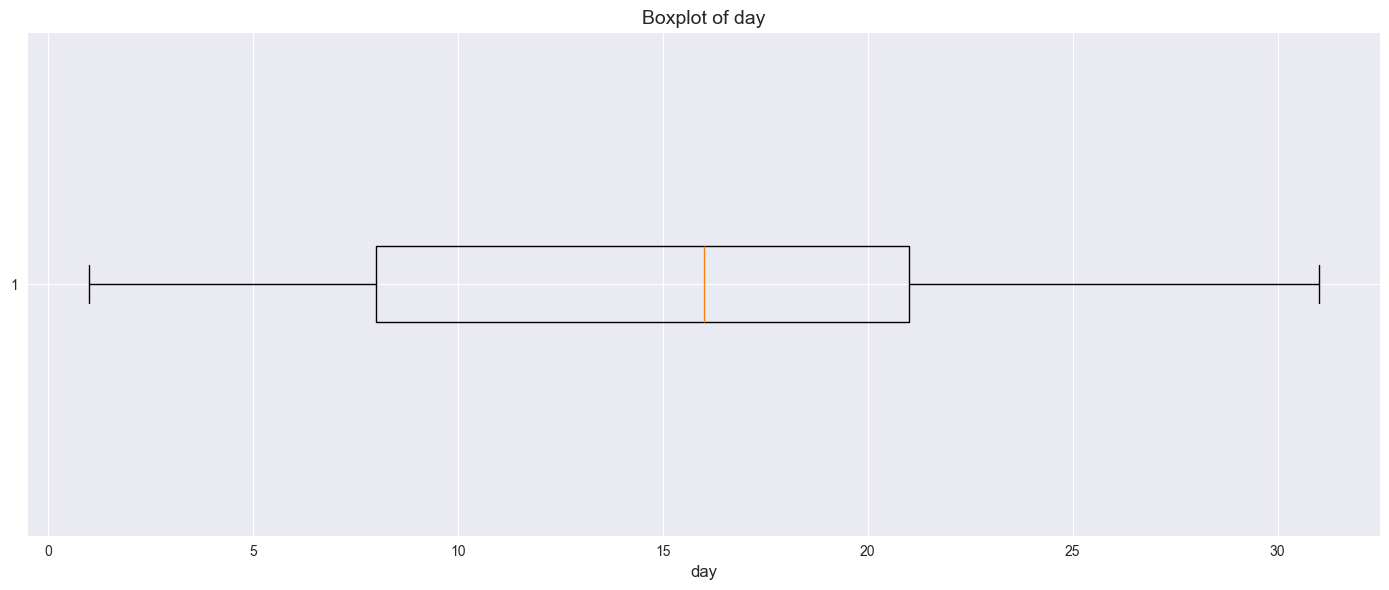

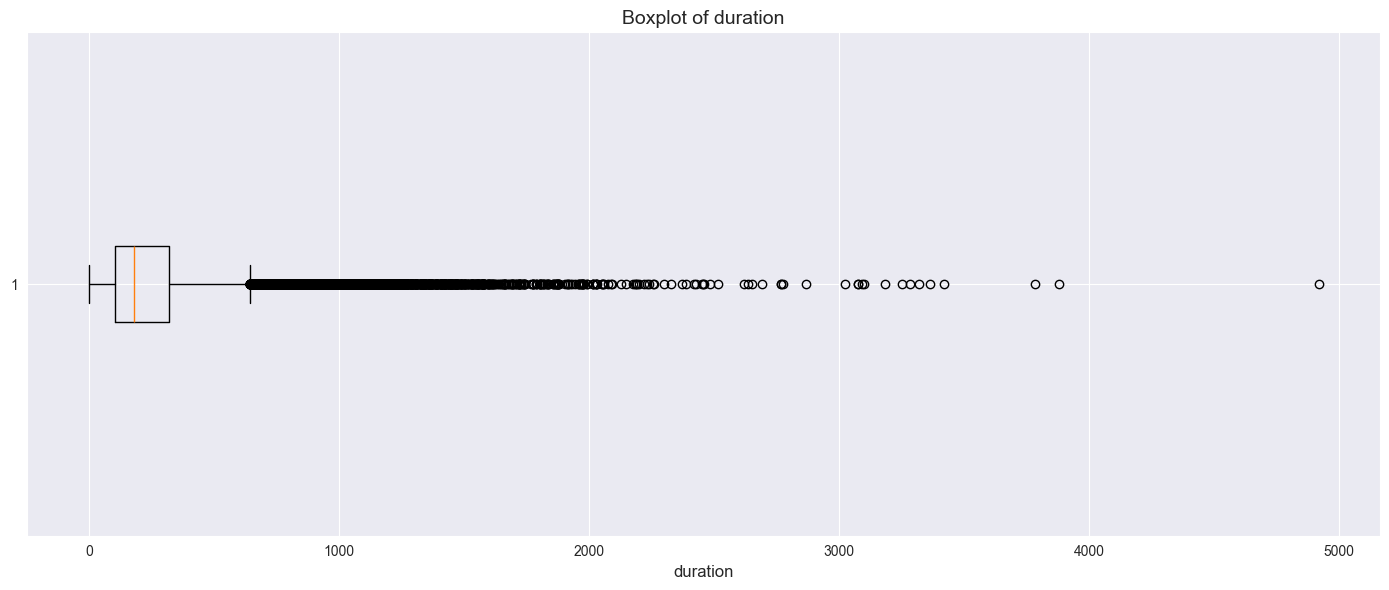

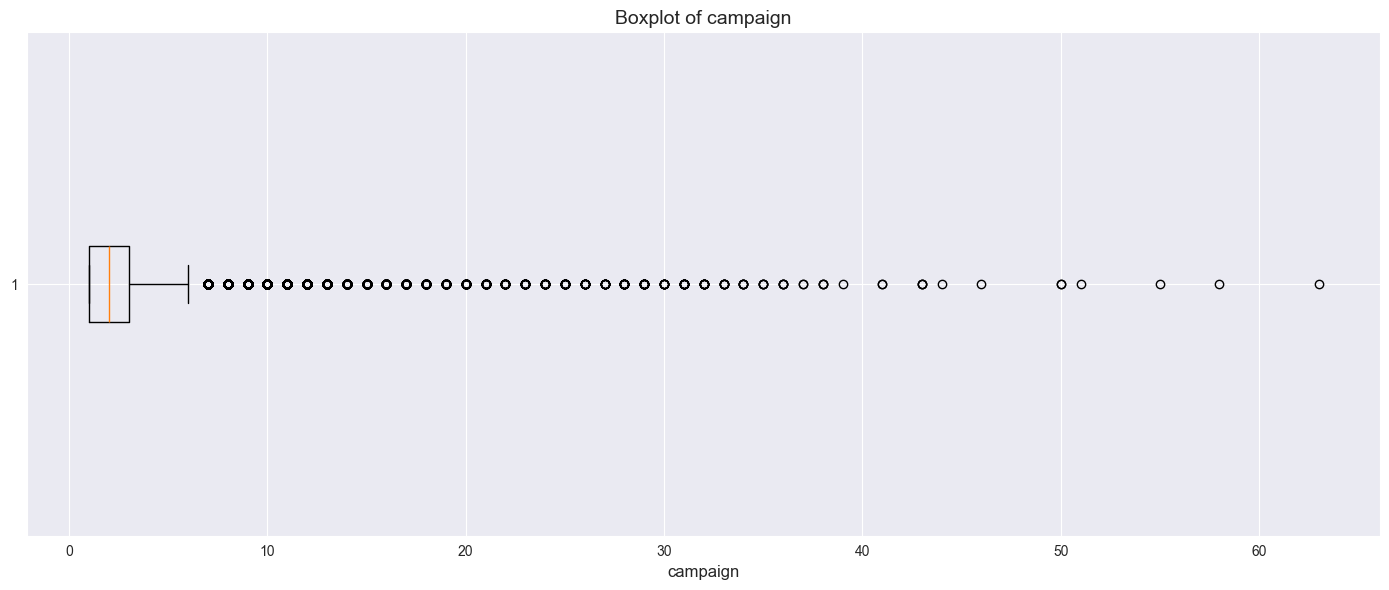

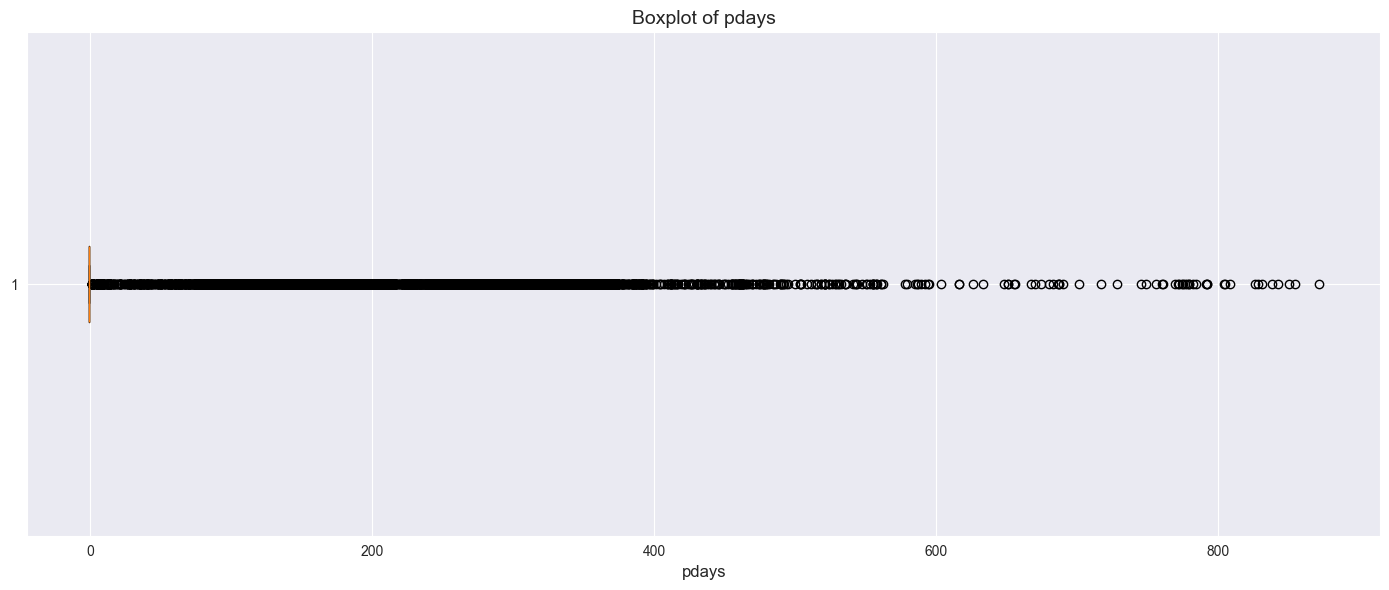

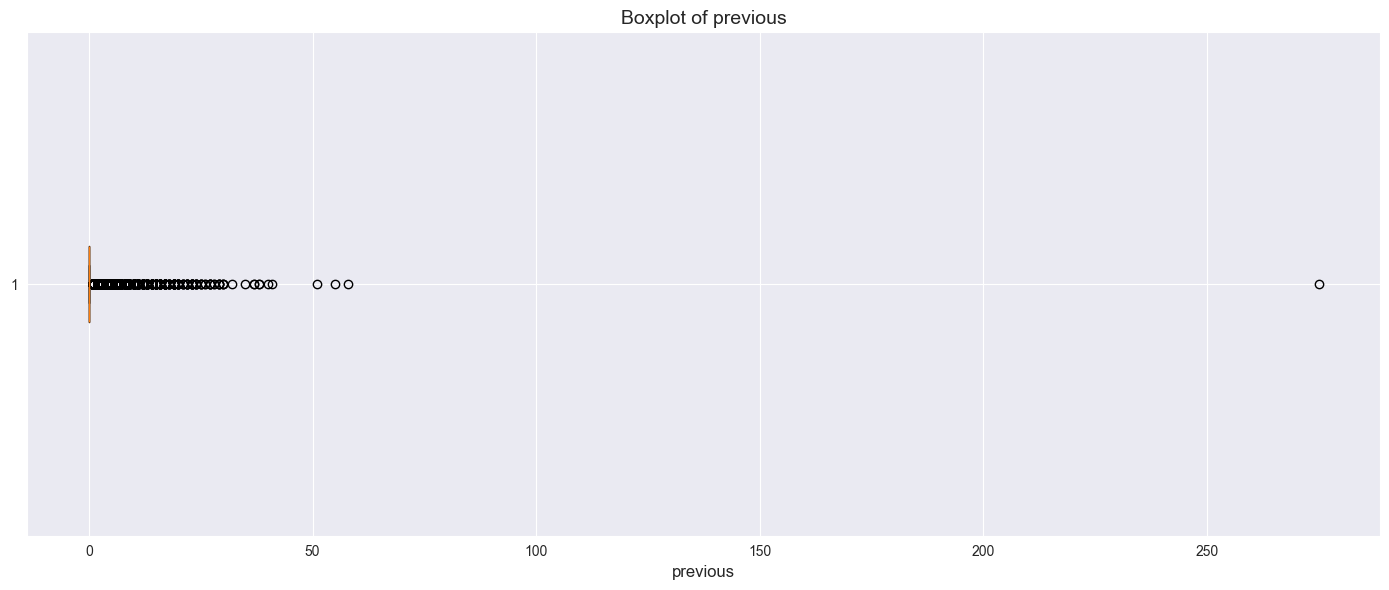

In [13]:
# generate box-plots for each numeric column
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(14, 6))
    plt.boxplot(data[column], vert=False)
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.tight_layout()
    plt.show()

### Identify features in dataset

In [14]:
# get all the features of dataset
features = data.columns

In [15]:
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
print("Total number of features : ", len(features))

Total number of features :  17


In [17]:
# identify categorical features
print(data.select_dtypes(include=['object']).columns[:-1])

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [18]:
# identify numerical features
print(data.select_dtypes(include=['number']).columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


### Explore Categorical Features

In [19]:
# get categorical features of dataset (without target feature)
categorical_features = data.select_dtypes(include=['object']).columns[:-1]

In [20]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [21]:
print("Total number of categorical features : ", len(categorical_features))

Total number of categorical features :  9


In [22]:
# check how many unique values, value count, value percentage are allowed for each categorical feature
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(f"Unique Values: {data[feature].nunique()}")
    value_counts = data[feature].value_counts()
    percentages = (value_counts / len(data[feature]) * 100).round(2)
    print(pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentages}))
    print("\n----------------------------------------------------------------------")


Feature: job
Unique Values: 12
               Count  Percentage (%)
job                                 
blue-collar     9732           21.53
management      9458           20.92
technician      7597           16.80
admin.          5171           11.44
services        4154            9.19
retired         2264            5.01
self-employed   1579            3.49
entrepreneur    1487            3.29
unemployed      1303            2.88
housemaid       1240            2.74
student          938            2.07
unknown          288            0.64

----------------------------------------------------------------------

Feature: marital
Unique Values: 3
          Count  Percentage (%)
marital                        
married   27214           60.19
single    12790           28.29
divorced   5207           11.52

----------------------------------------------------------------------

Feature: education
Unique Values: 4
           Count  Percentage (%)
education                       
secondar

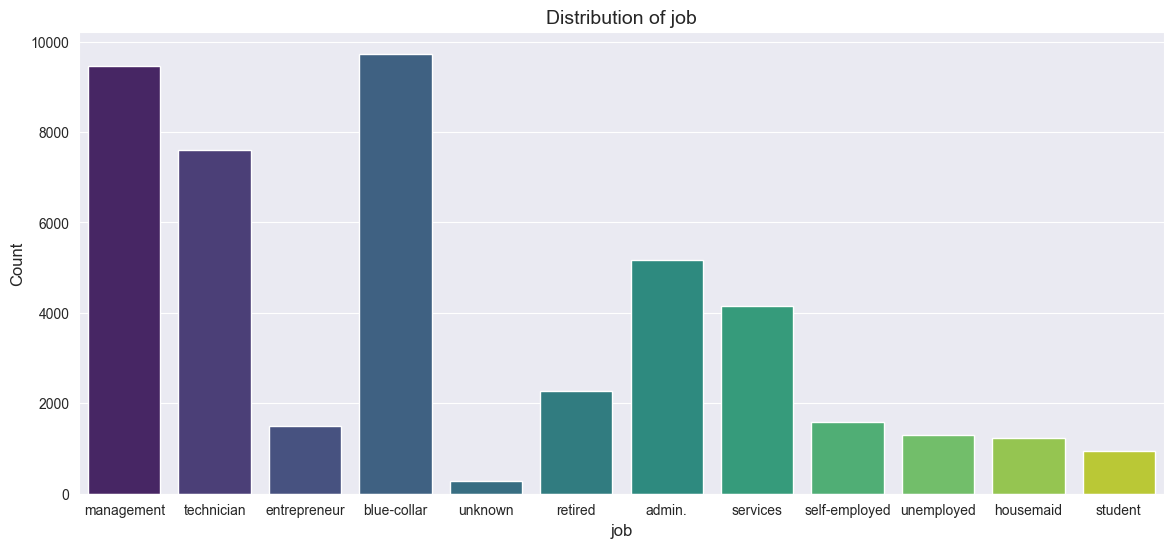

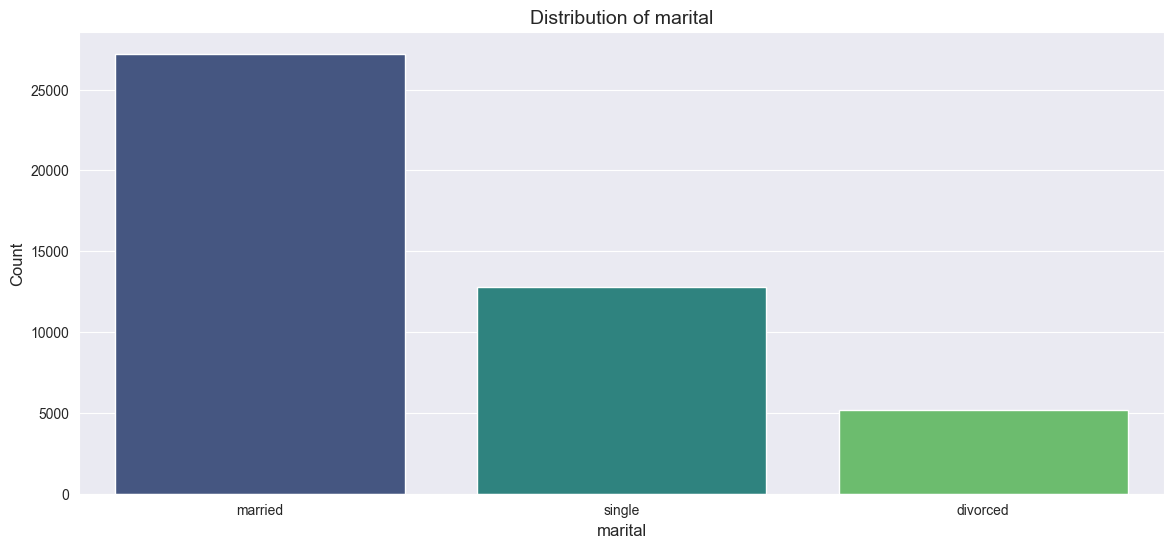

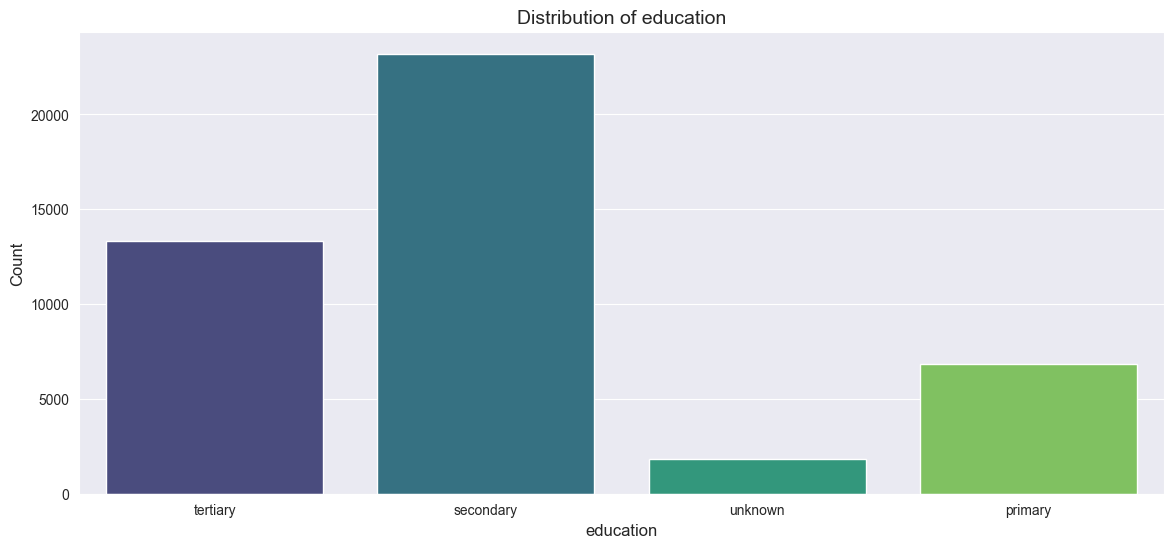

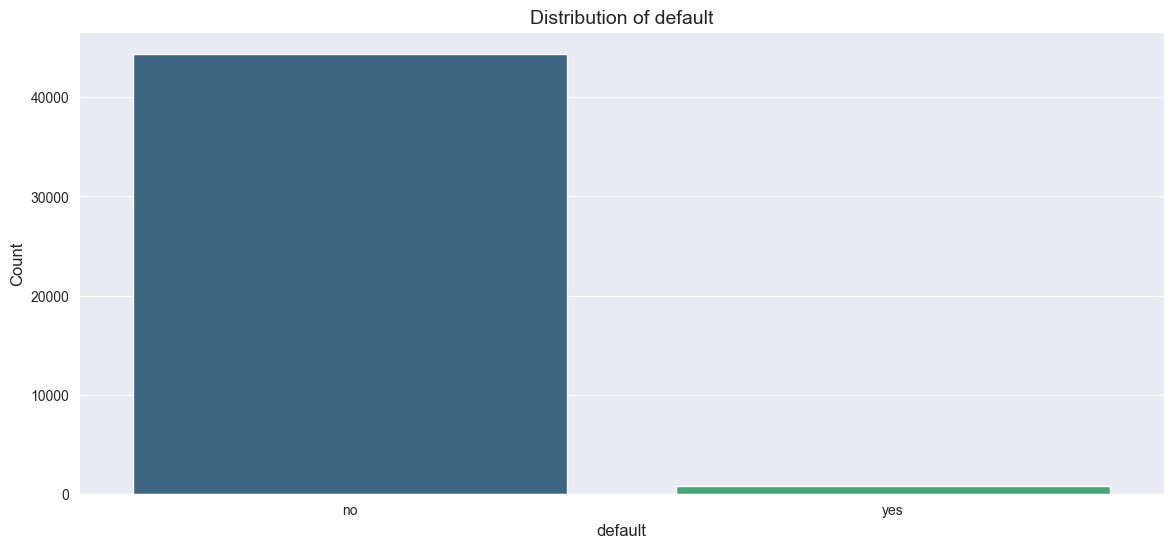

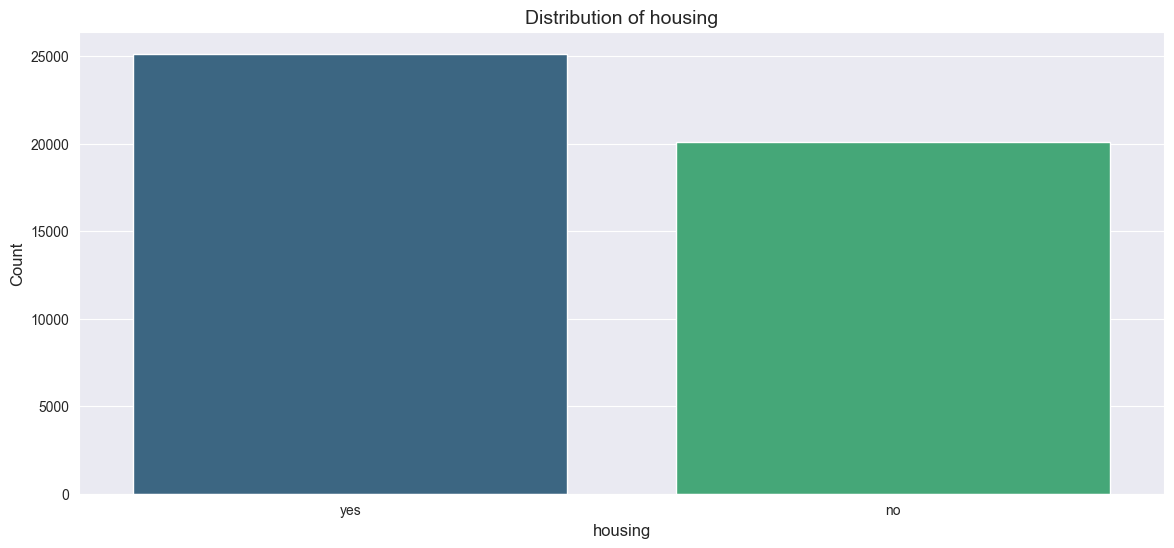

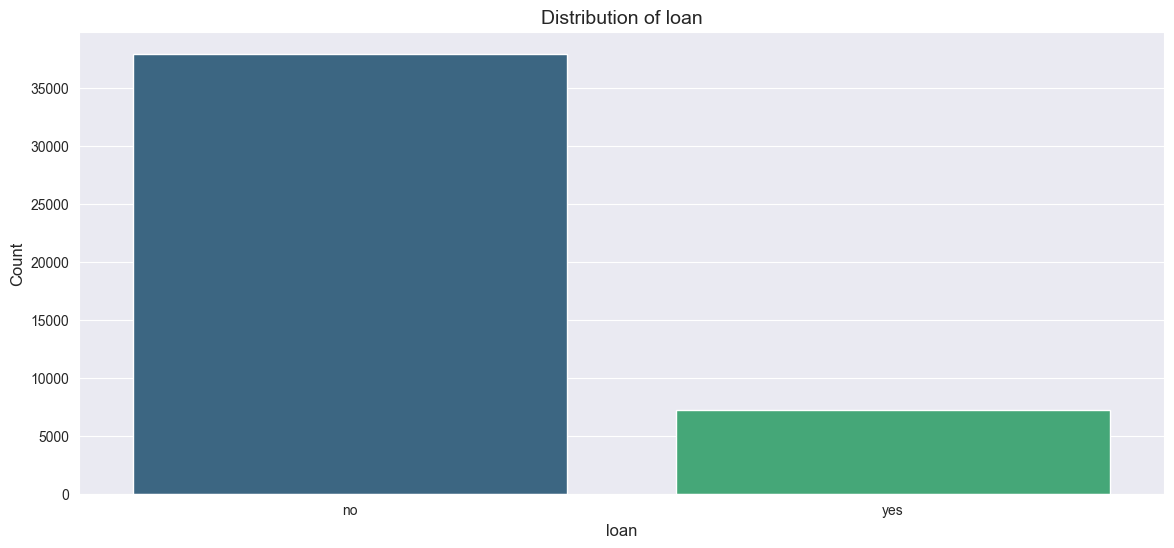

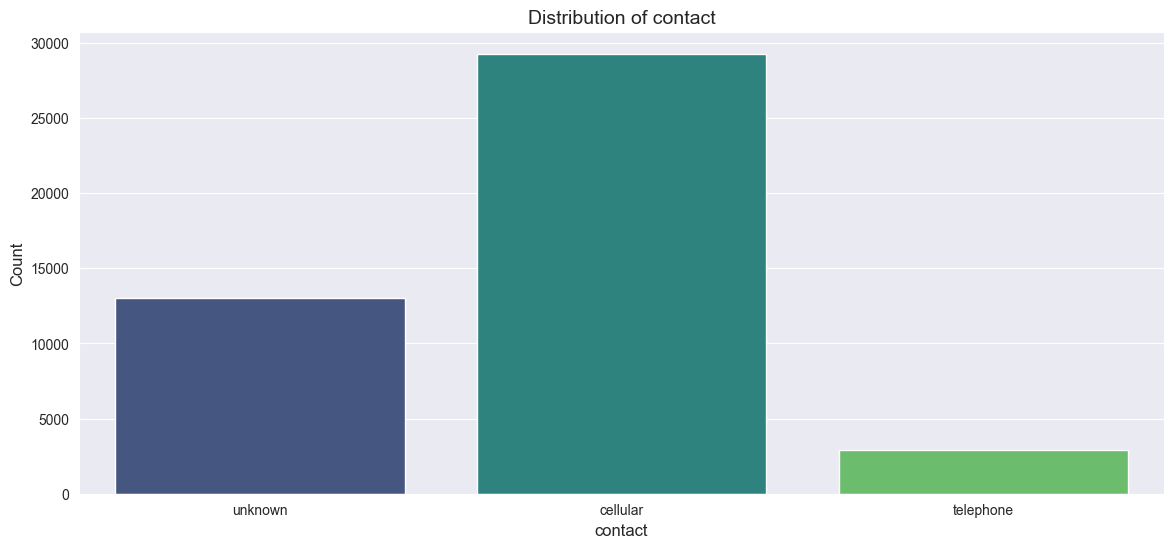

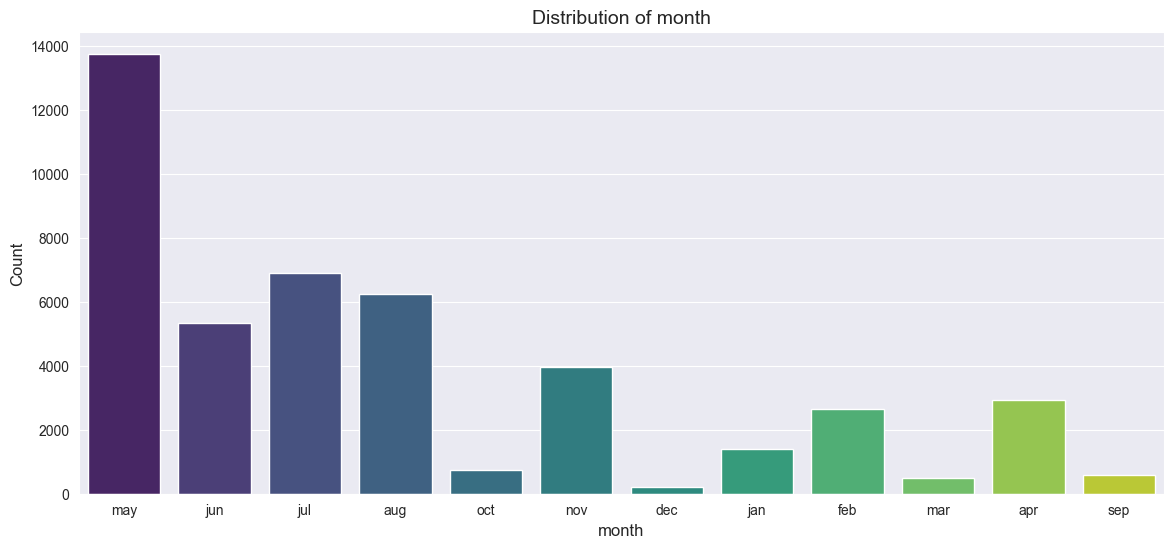

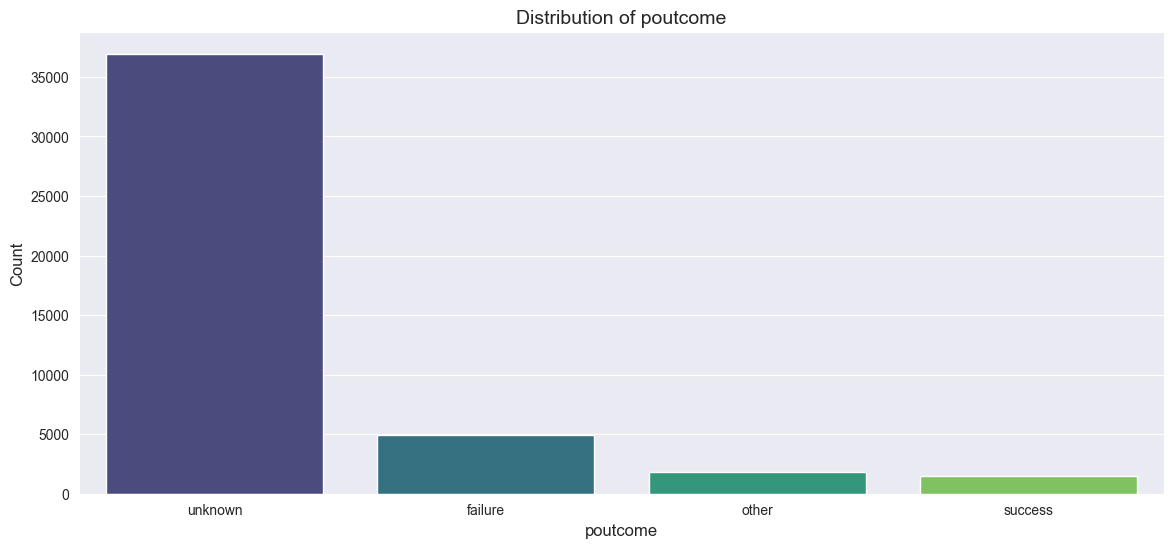

In [23]:
# plot unique values with count respect to each feature
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x=feature, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

### Explore Numerical Features

In [24]:
# get numerical features of dataset
numerical_features = data.select_dtypes(include=['number']).columns

In [25]:
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [26]:
print("Total number of numerical features : ", len(numerical_features))

Total number of numerical features :  7


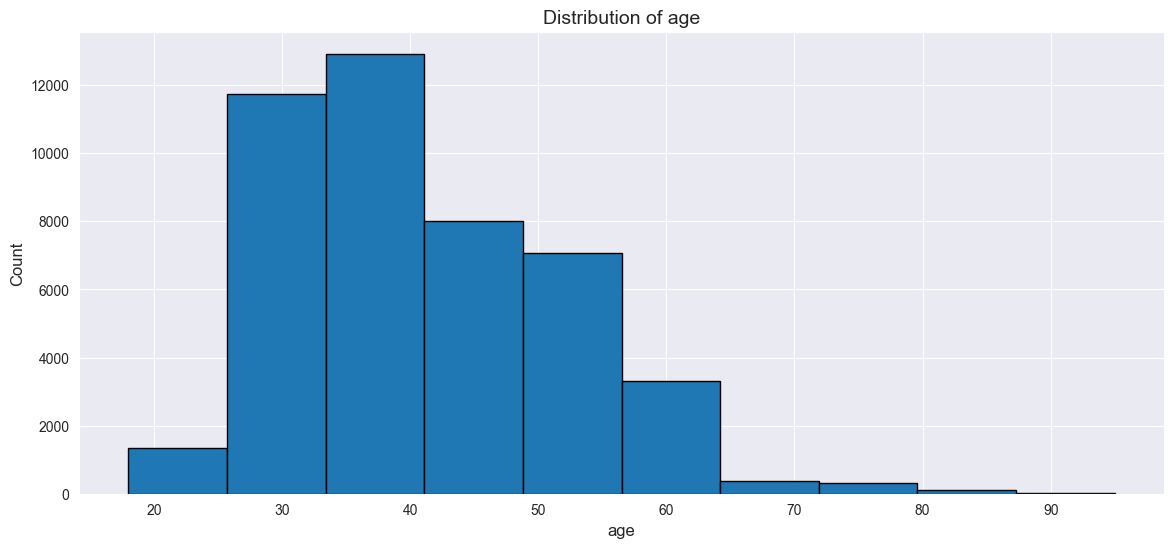

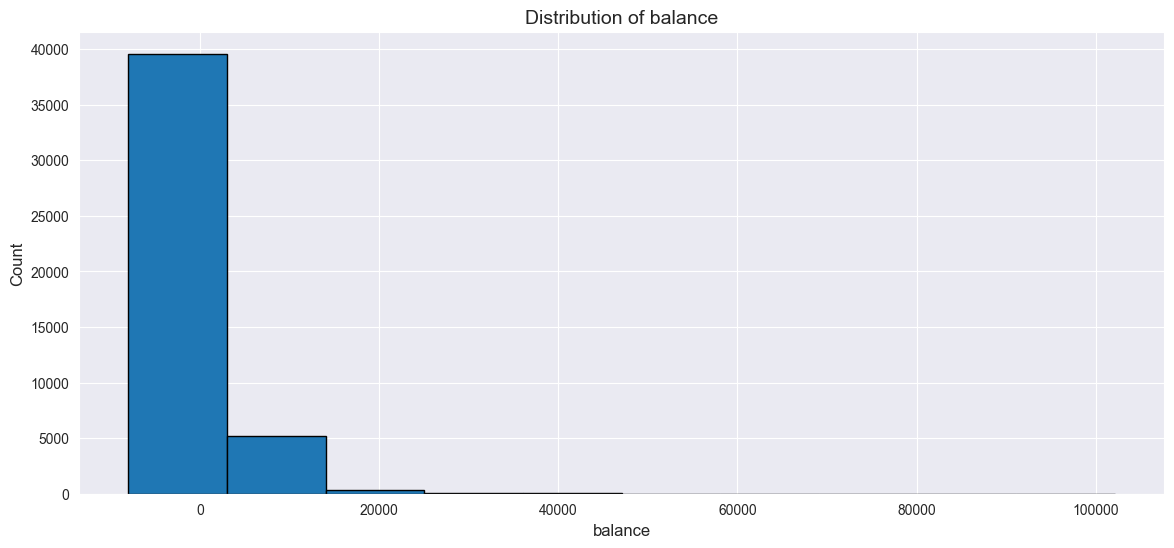

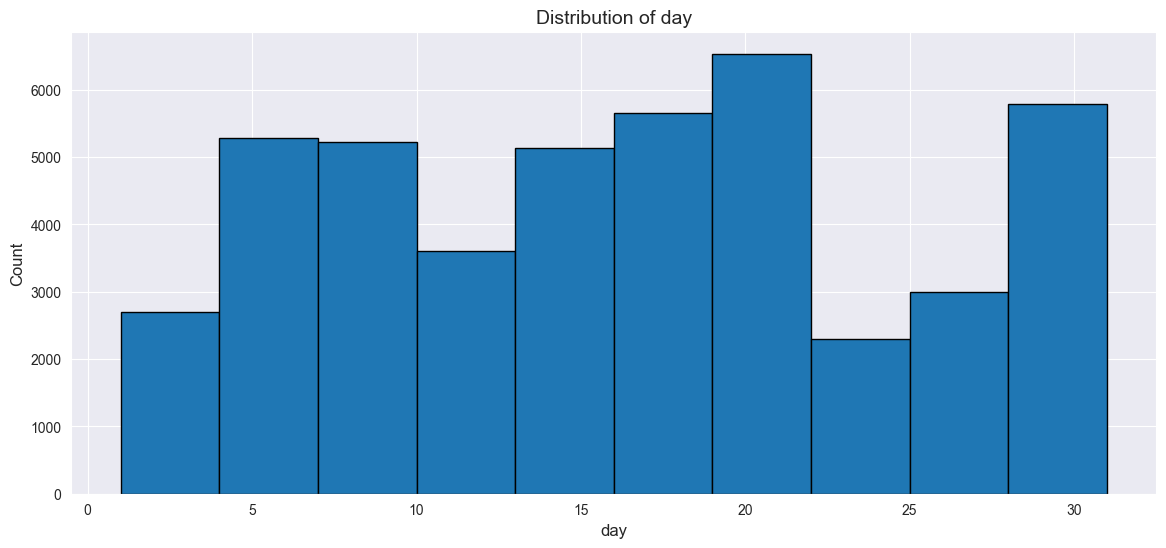

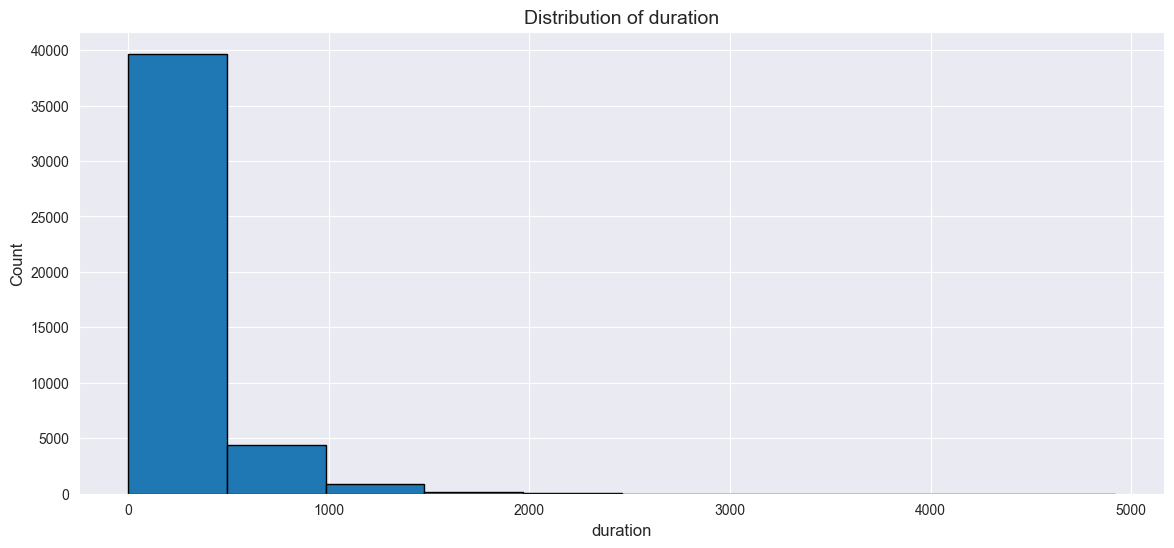

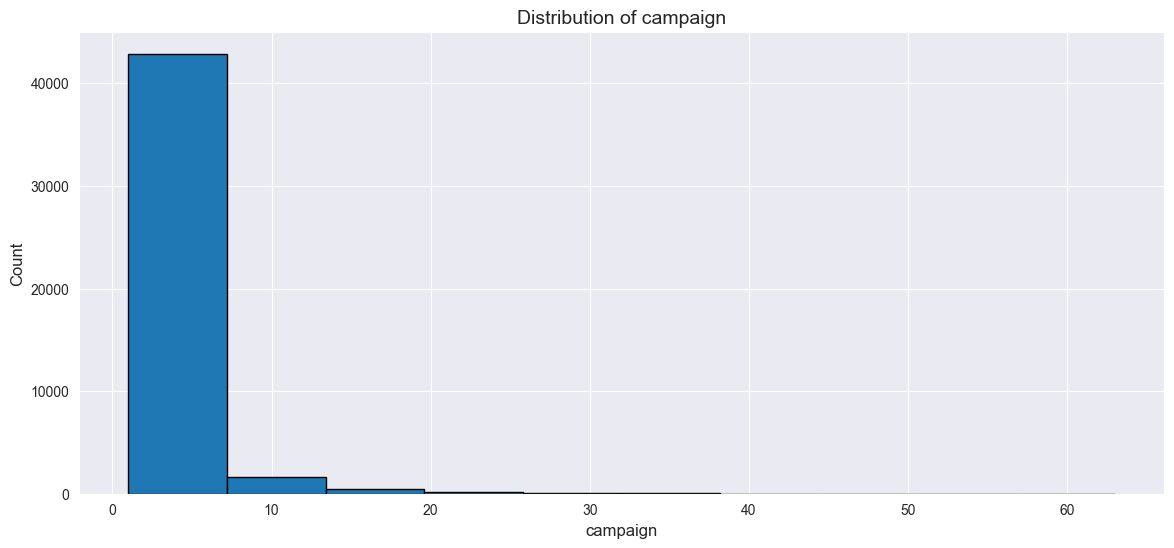

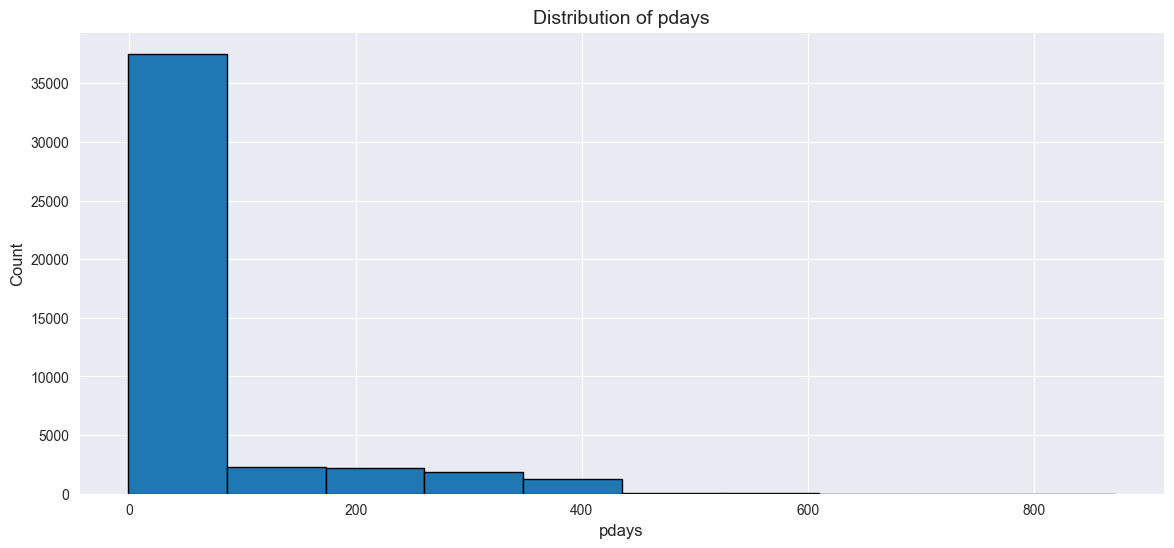

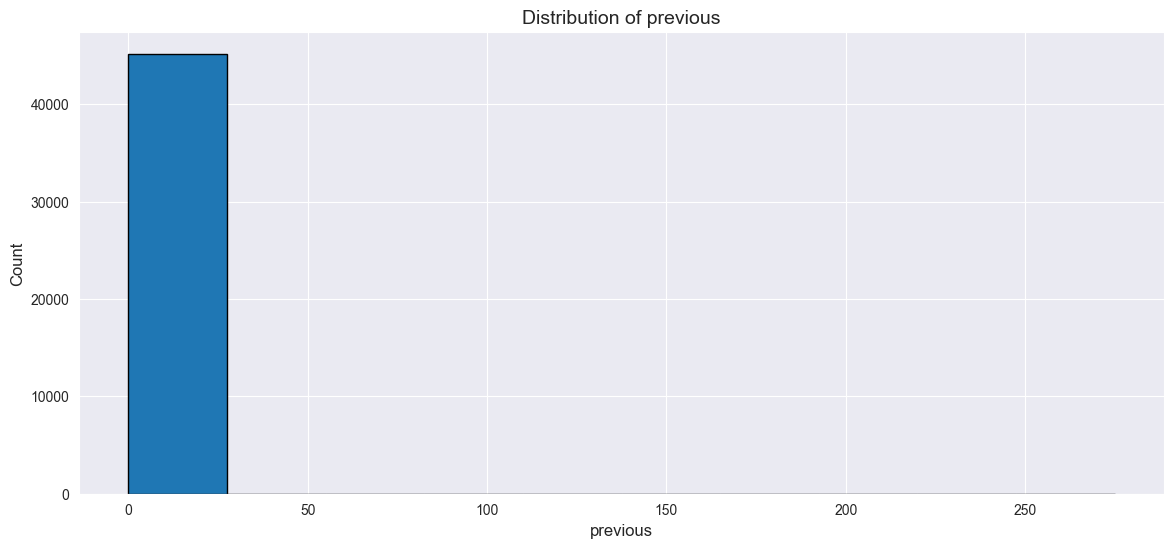

In [27]:
# plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(14, 6))  
    plt.hist(data[feature], bins=10, edgecolor='black') 
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

In [28]:
# finding relationships between numerical variables using correlation matrix
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

In [29]:
# display correlation matrix
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


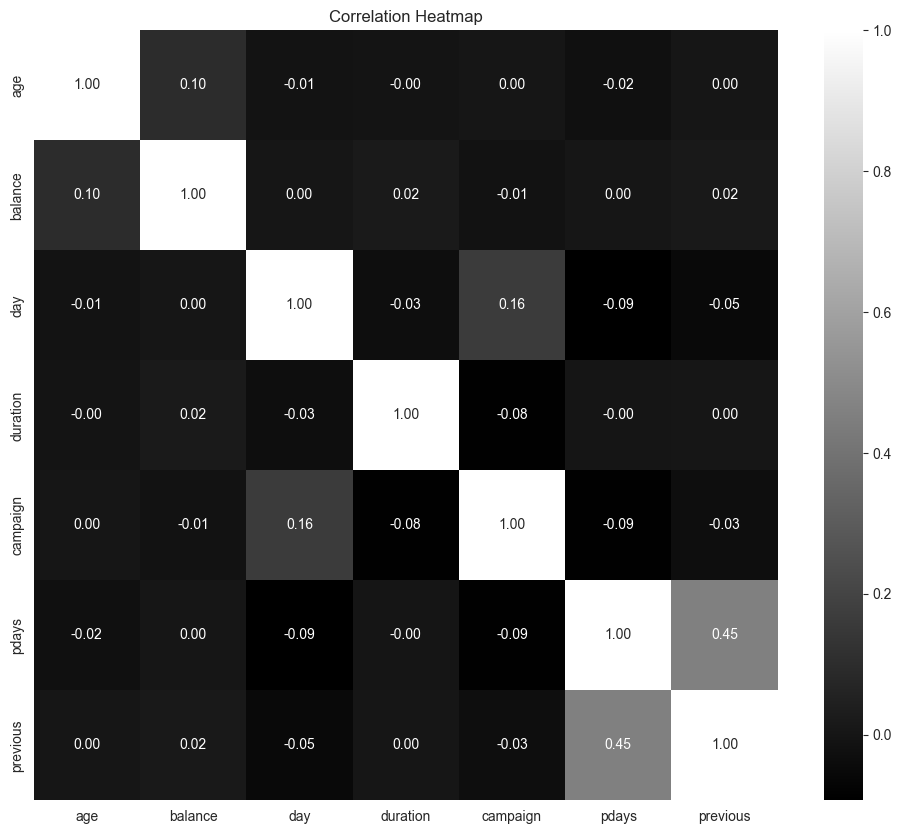

In [30]:
# plot the correlation matrix using heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="gray")
plt.title('Correlation Heatmap')
plt.show()

### Understand the Target Feature

In [31]:
# get target variable
target = data["y"]

In [32]:
target

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [33]:
# analyze the target variable if there is class unbalance problem
print("Target Class Distribution:")
count = target.value_counts()
print(count)

Target Class Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


In [34]:
# check target variables as a percentage
print("Target Class Distribution as Percentage:")
target_as_percentage = target.value_counts() / len(data) * 100
print(target_as_percentage)

Target Class Distribution as Percentage:
y
no     88.30152
yes    11.69848
Name: count, dtype: float64


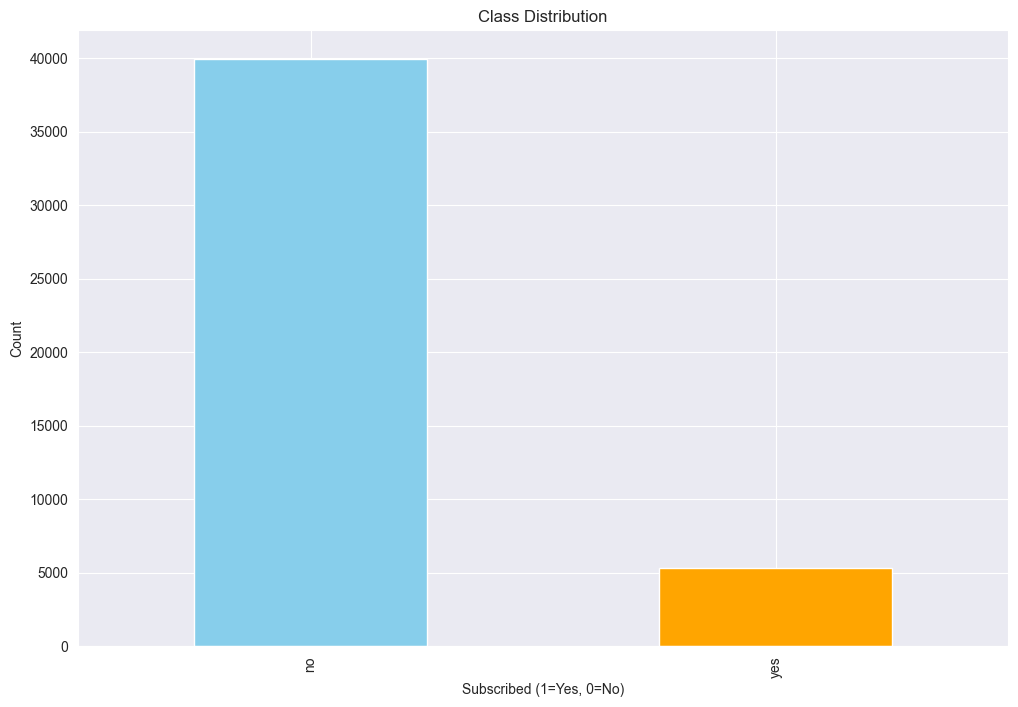

In [35]:
# visualize the target variable distribution
plt.figure(figsize=(12, 8))
target.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

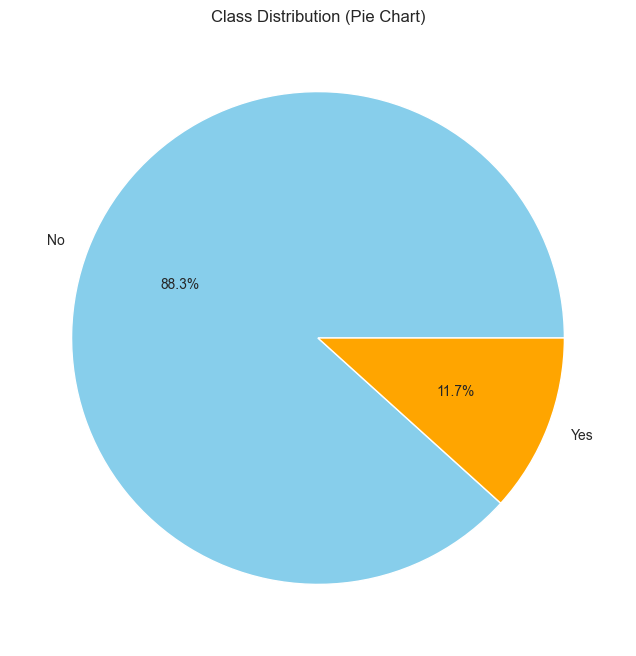

In [36]:
# Plot the pie chart for class distribution
plt.figure(figsize=(8, 8))
target.value_counts().plot(kind='pie', labels=['No', 'Yes'], colors=['skyblue', 'orange'], autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("") 
plt.show()

### Feature Relationships

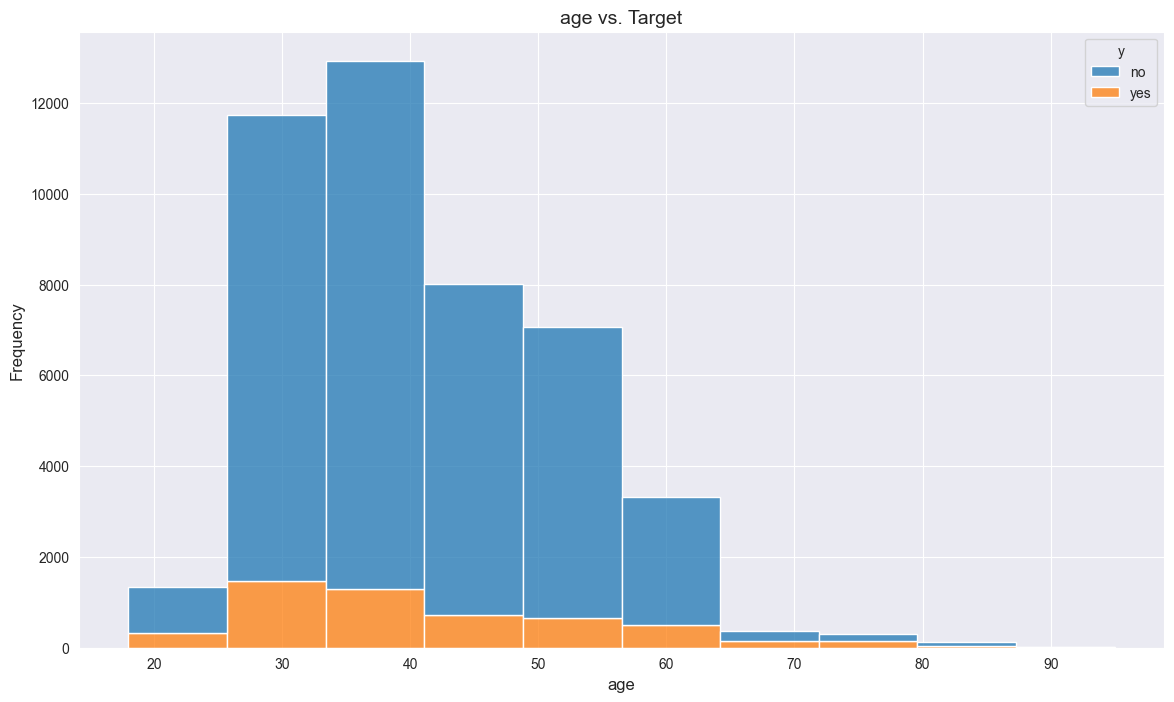

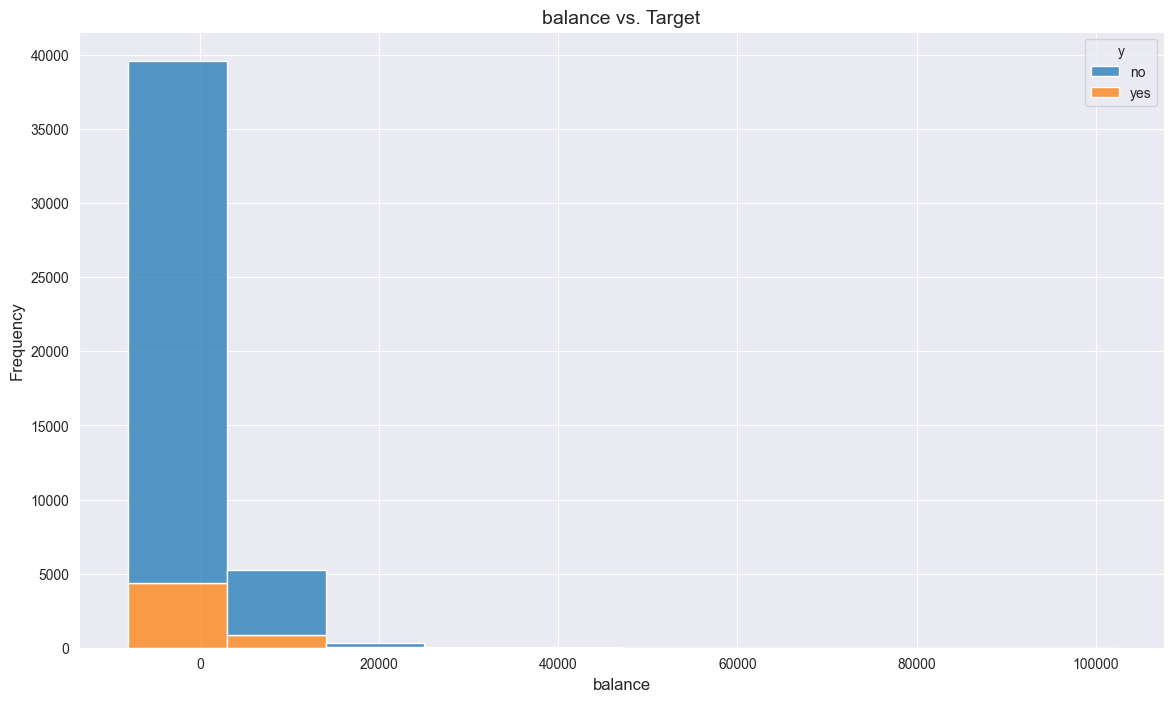

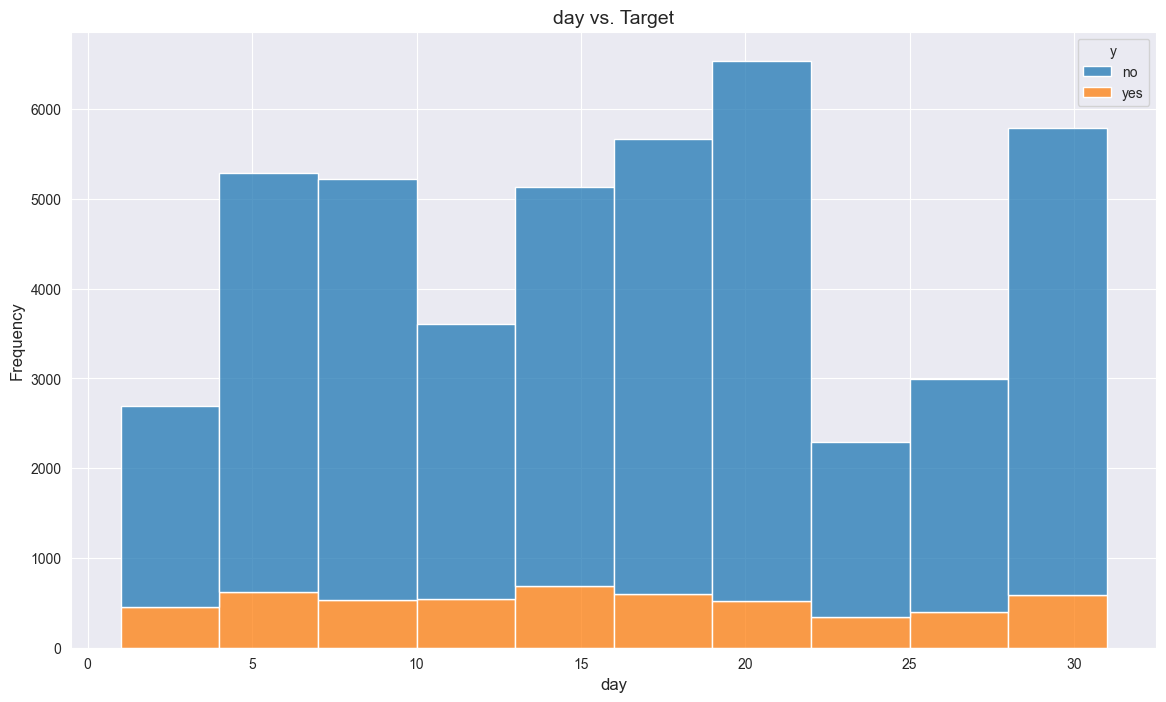

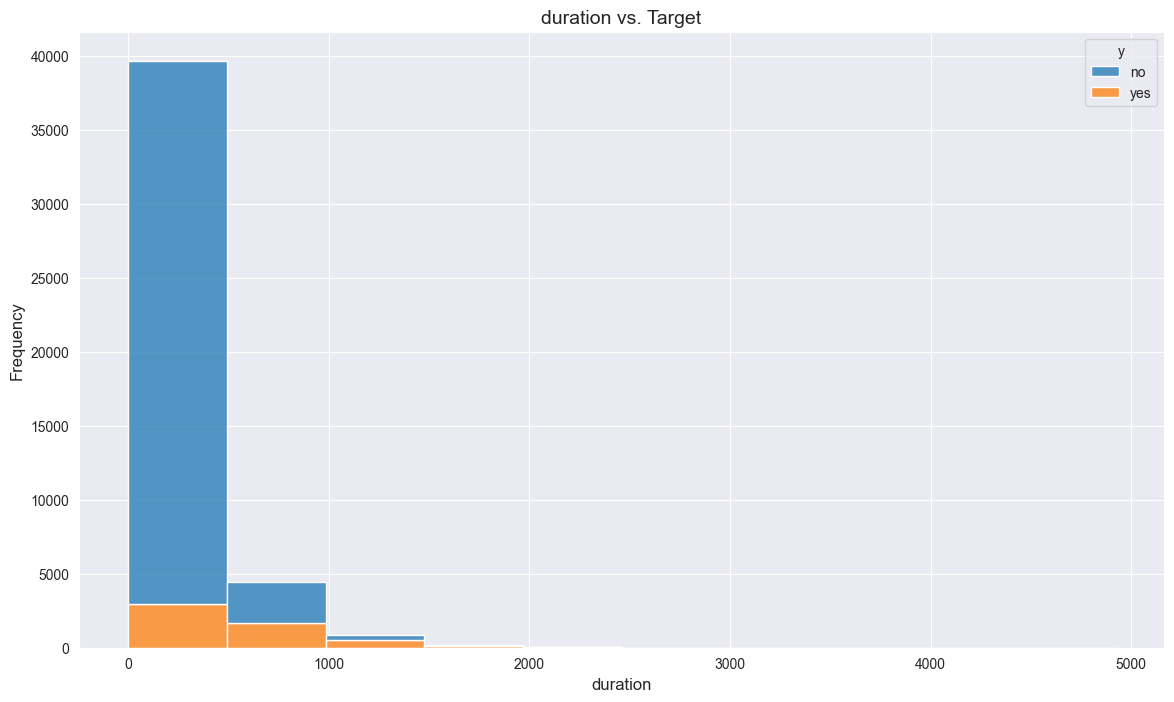

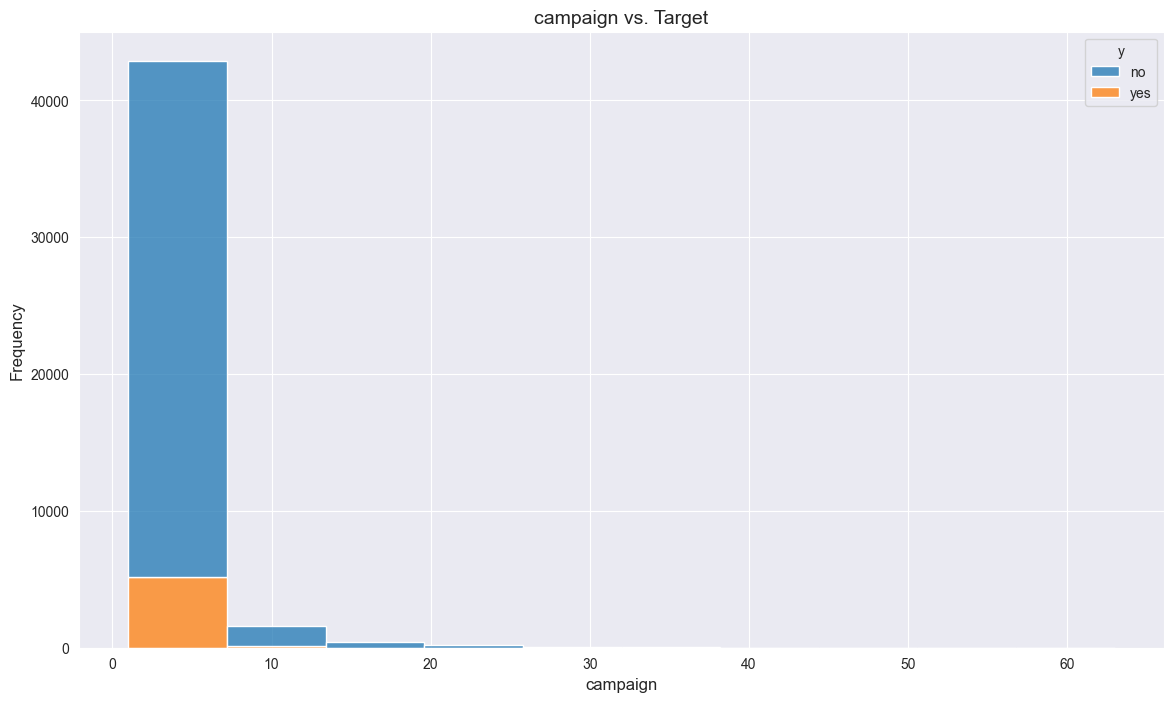

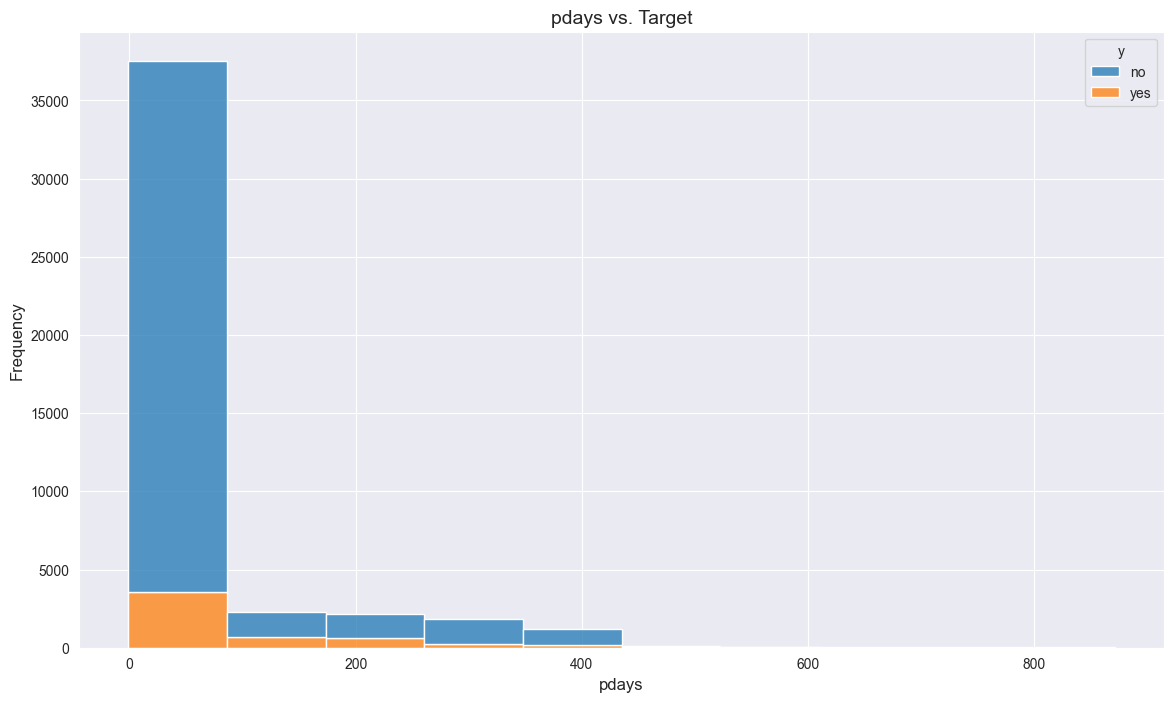

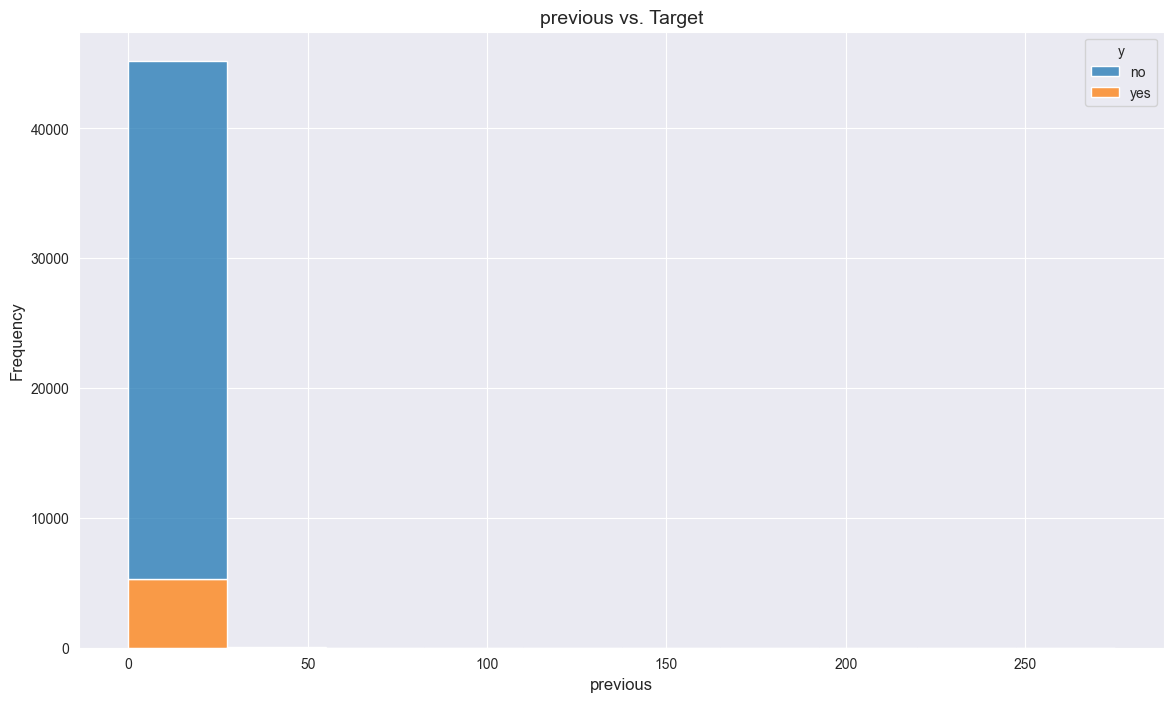

In [37]:
# find feature relationship between numerical features and target
for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.histplot(data=data, x=feature, hue="y", multiple="stack", bins=10)
    plt.title(f'{feature} vs. Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

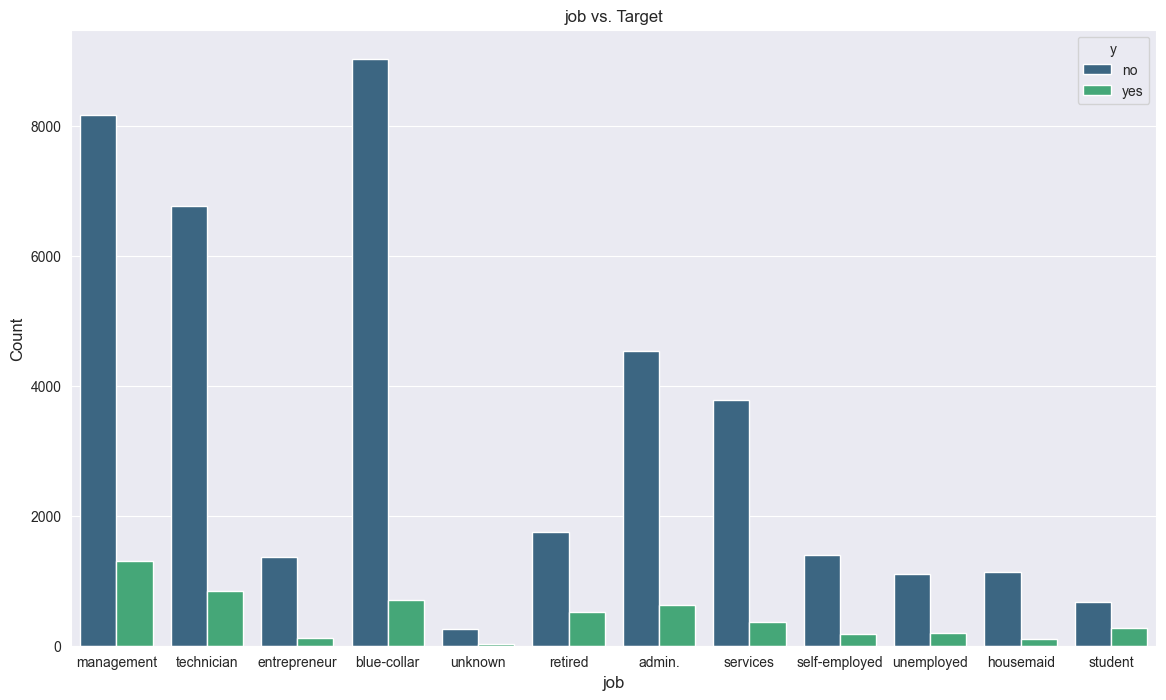

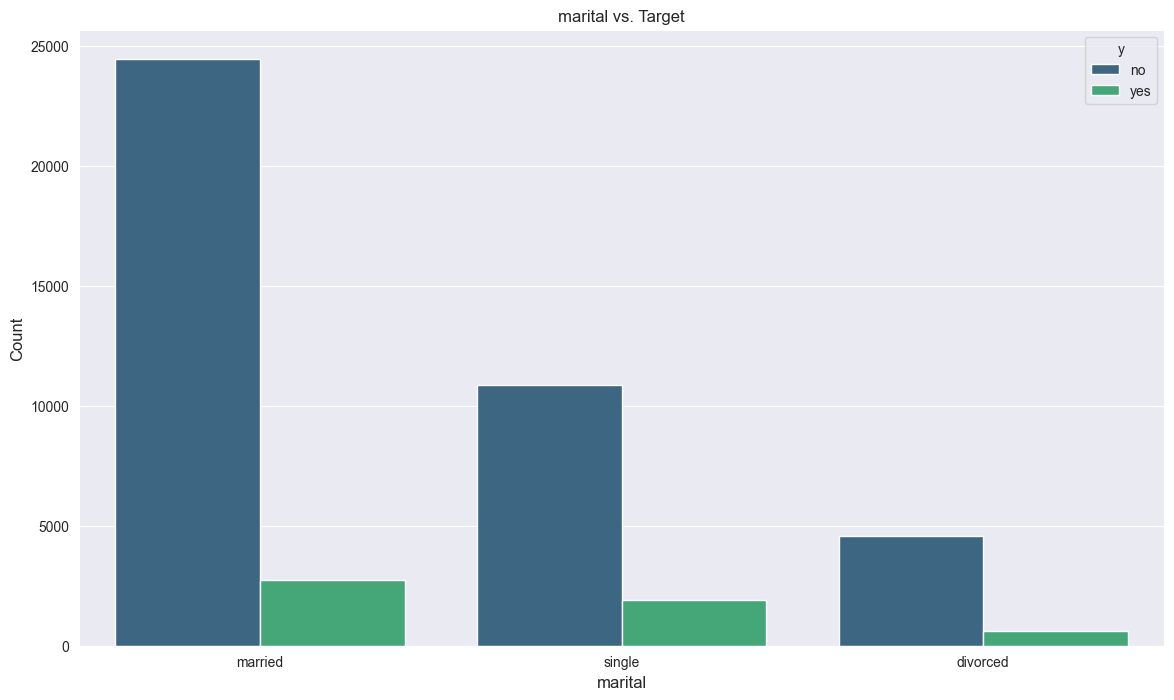

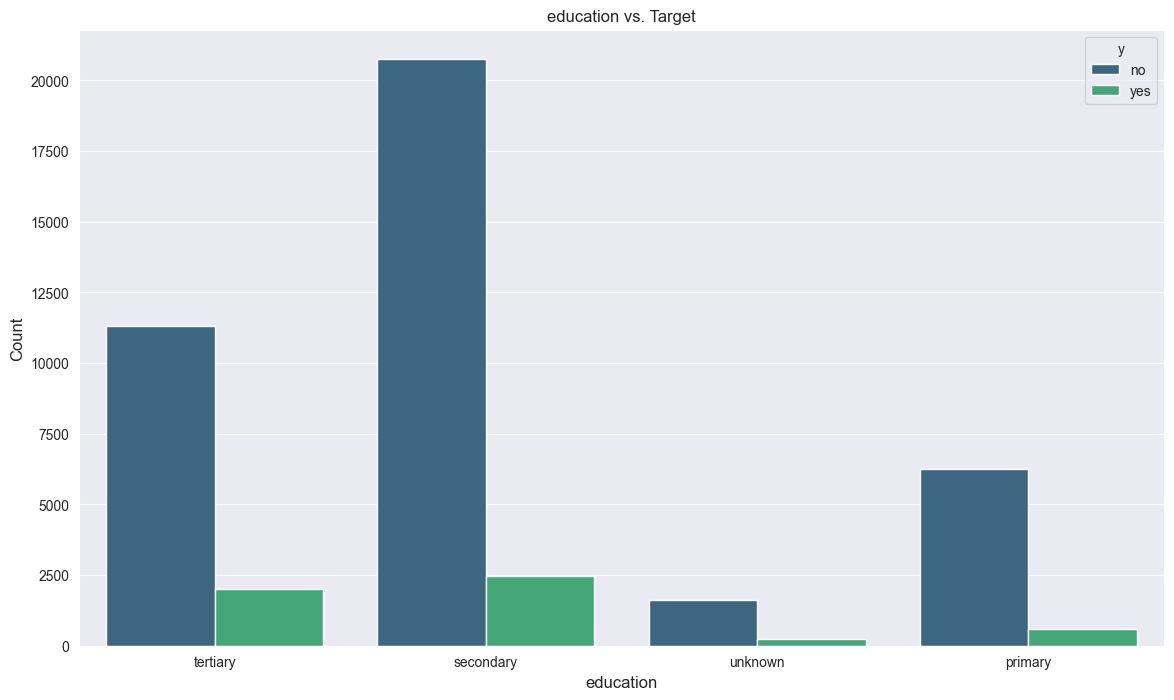

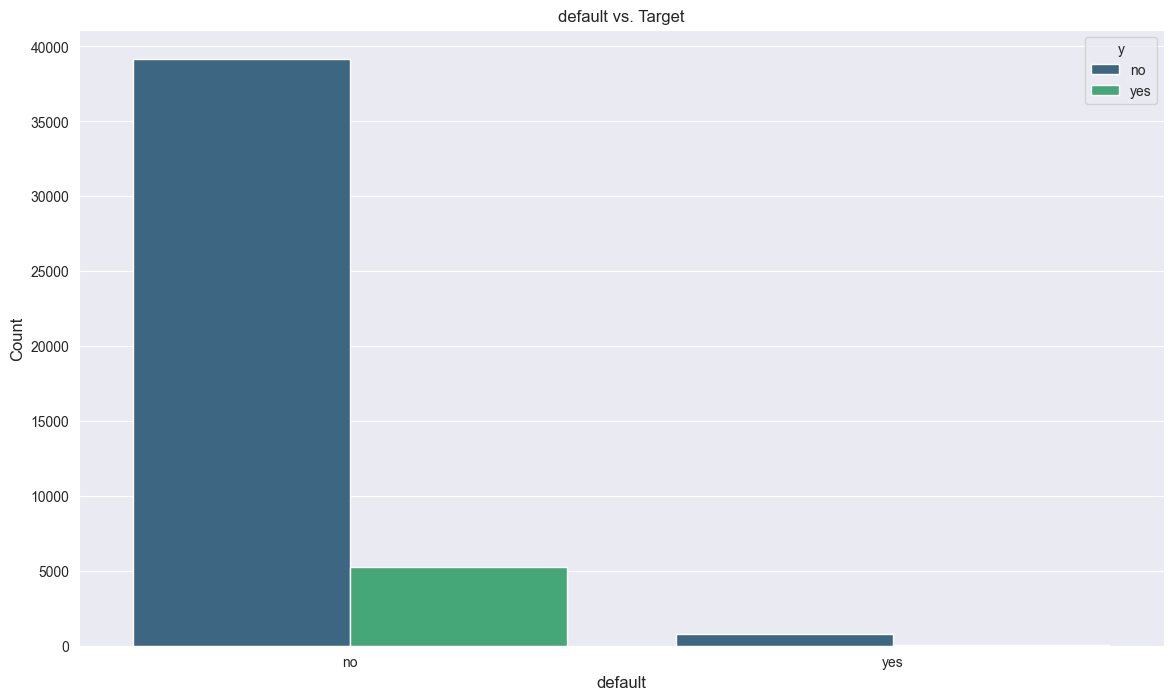

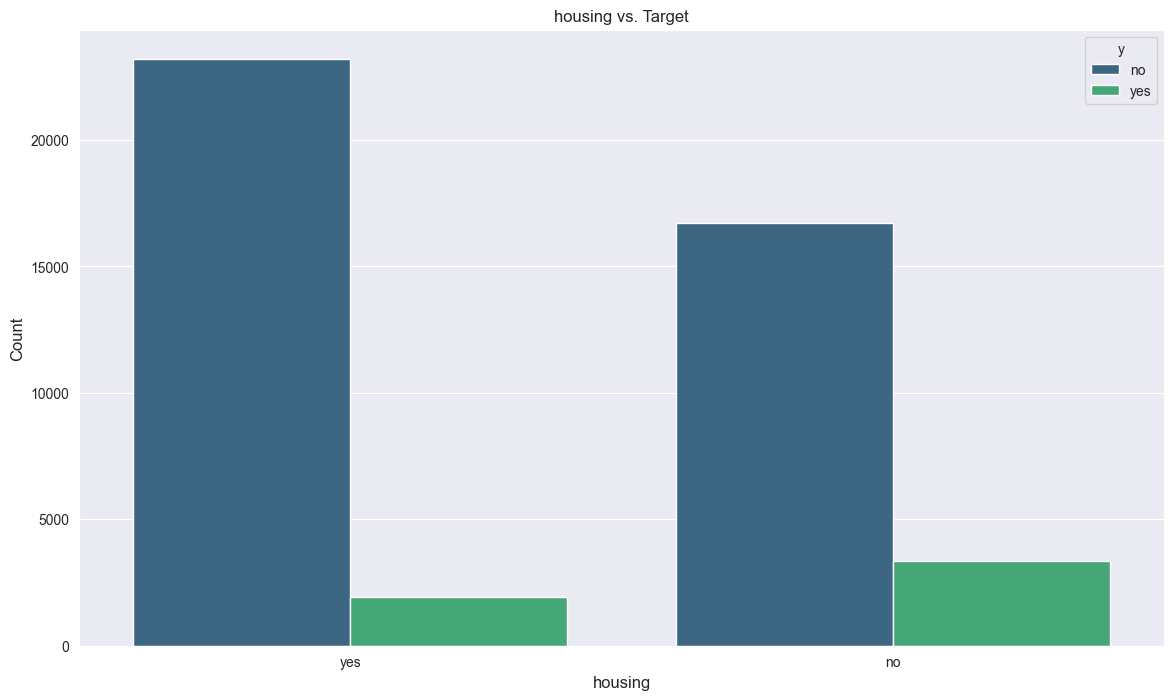

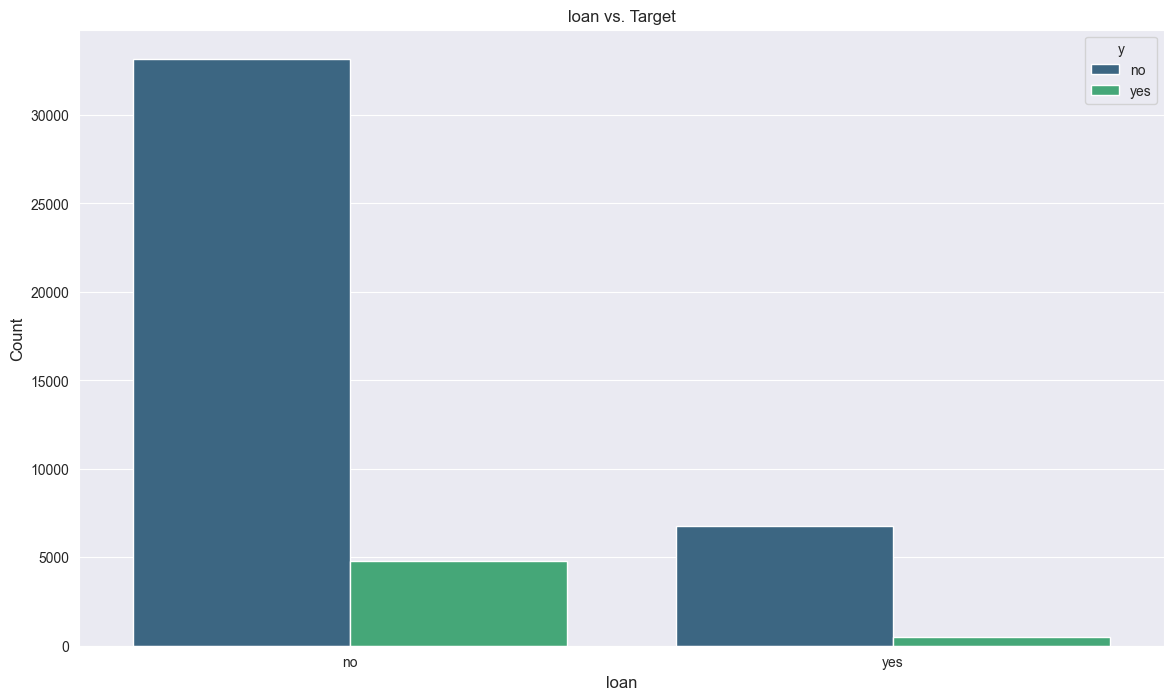

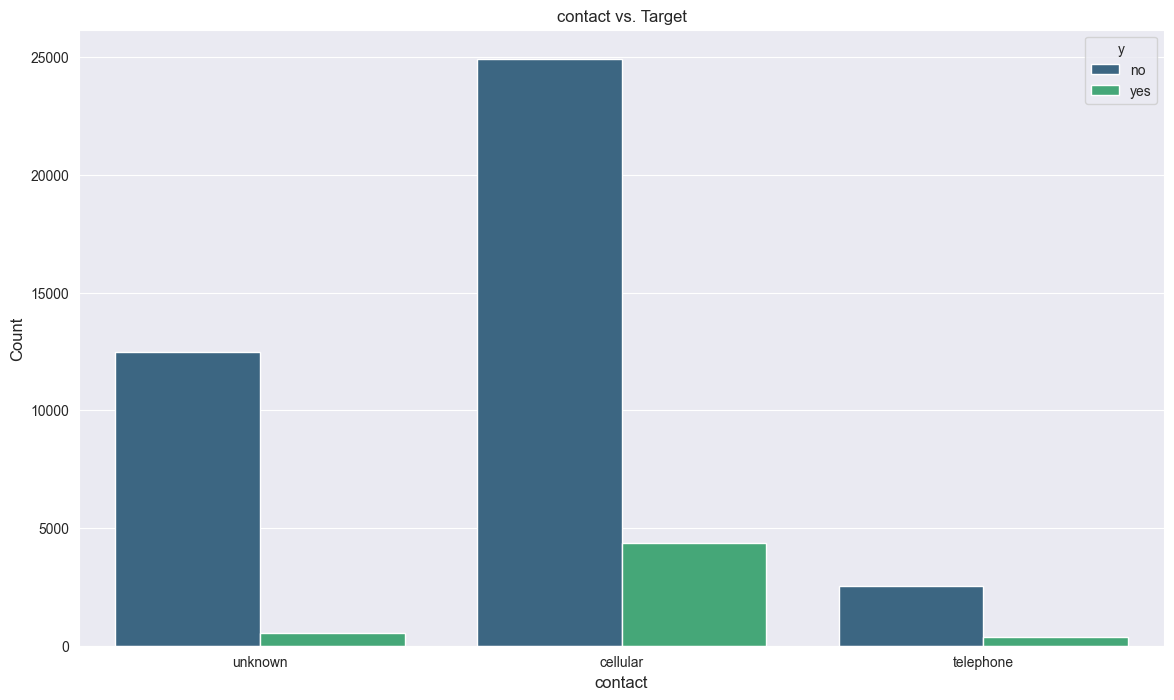

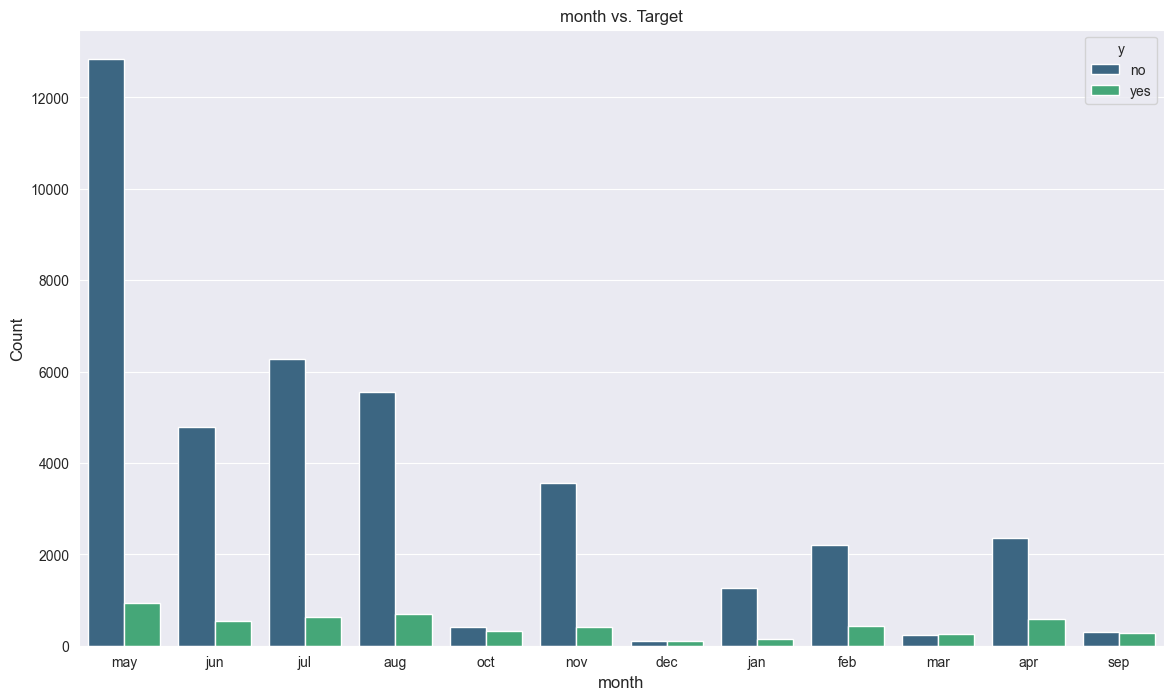

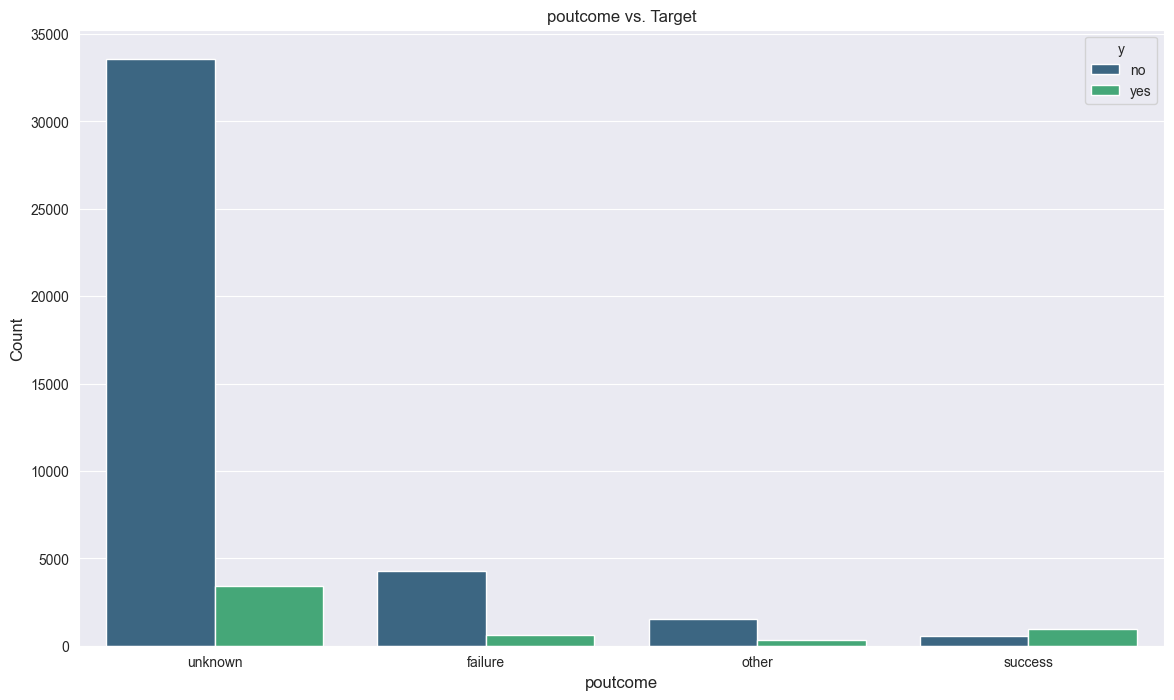

In [38]:
# find feature relationship between categorical features and target
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, hue='y', data=data, palette='viridis')
    plt.title(f'{feature} vs. Target')
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

# Data Cleaning

### Handle Outliers

In [39]:
# get copy of dataset
data = data.copy()

In [40]:
# shape of dataset
data.shape

(45211, 17)

In [41]:
# shape of numerical data in dataset
numeric_data.shape

(45211, 7)

In [42]:
# calculate IQR for numeric features
Q1 = numeric_data.quantile(0.25)  # first quantile
Q3 = numeric_data.quantile(0.75)  # second quantile

IQR = Q3 - Q1  

In [43]:
# define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
print("Lower limit of numerical features:")
lower_bound

Lower limit of numerical features:


age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64

In [45]:
print("Upper limit of numerical features:")
upper_bound

Upper limit of numerical features:


age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64

In [46]:
# create a mask for valid rows (no outliers in any numeric column)
mask = ((numeric_data >= lower_bound) & (numeric_data <= upper_bound)).all(axis=1)

In [47]:
# Apply the mask to the original DataFrame
data_cleaned = data[mask]

In [48]:
data_cleaned.to_csv("data\\cleaned_dataset.csv", index=False)

In [49]:
print("Cleaned Data Shape (All Columns):", data_cleaned.shape)

Cleaned Data Shape (All Columns): (28193, 17)


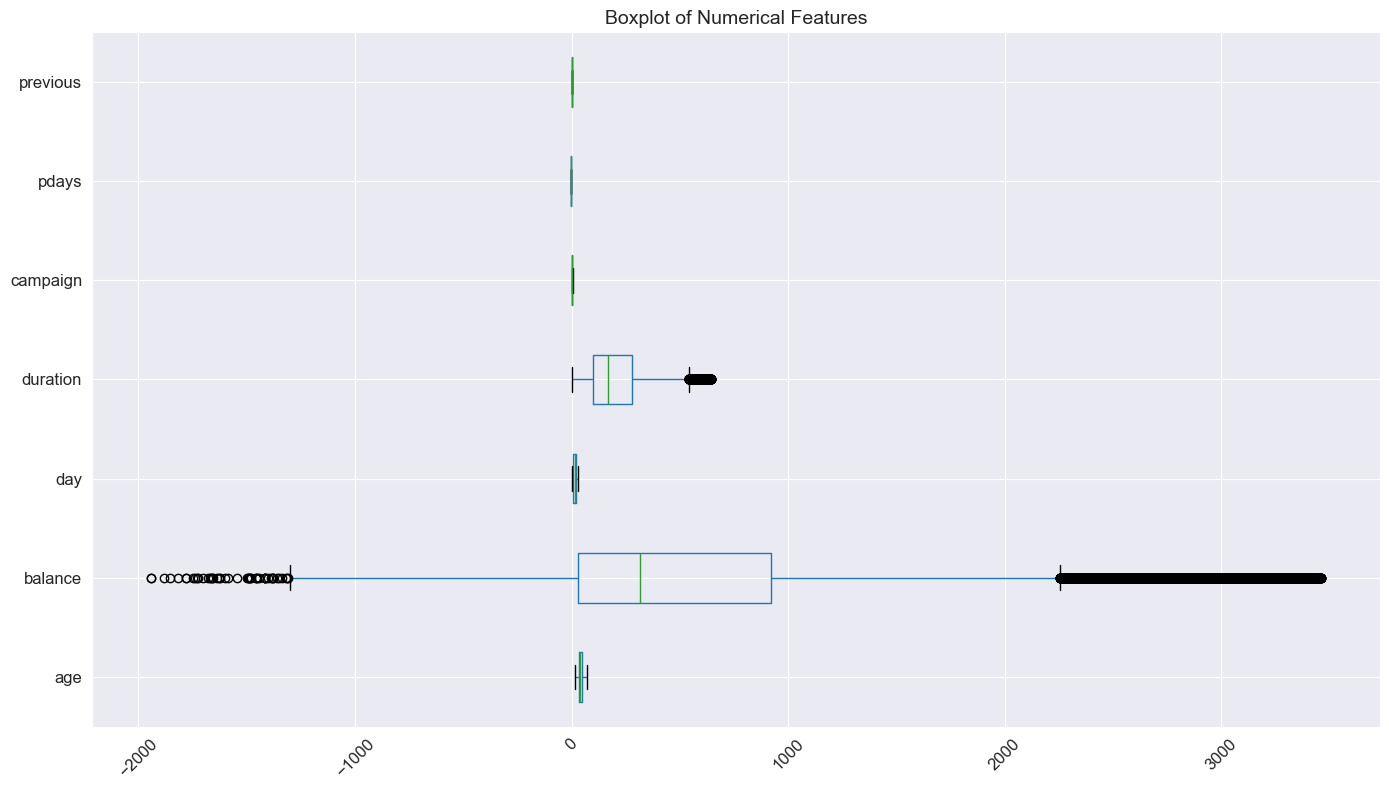

In [50]:
# generate boxplot for all numerical features
plt.figure(figsize=(14, 8))
data_cleaned.boxplot(vert=False)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Feature selection

In [51]:
# split cleaned data into independent and dependent
independent = data_cleaned.drop('y',axis=1)
dependent  = data_cleaned['y']

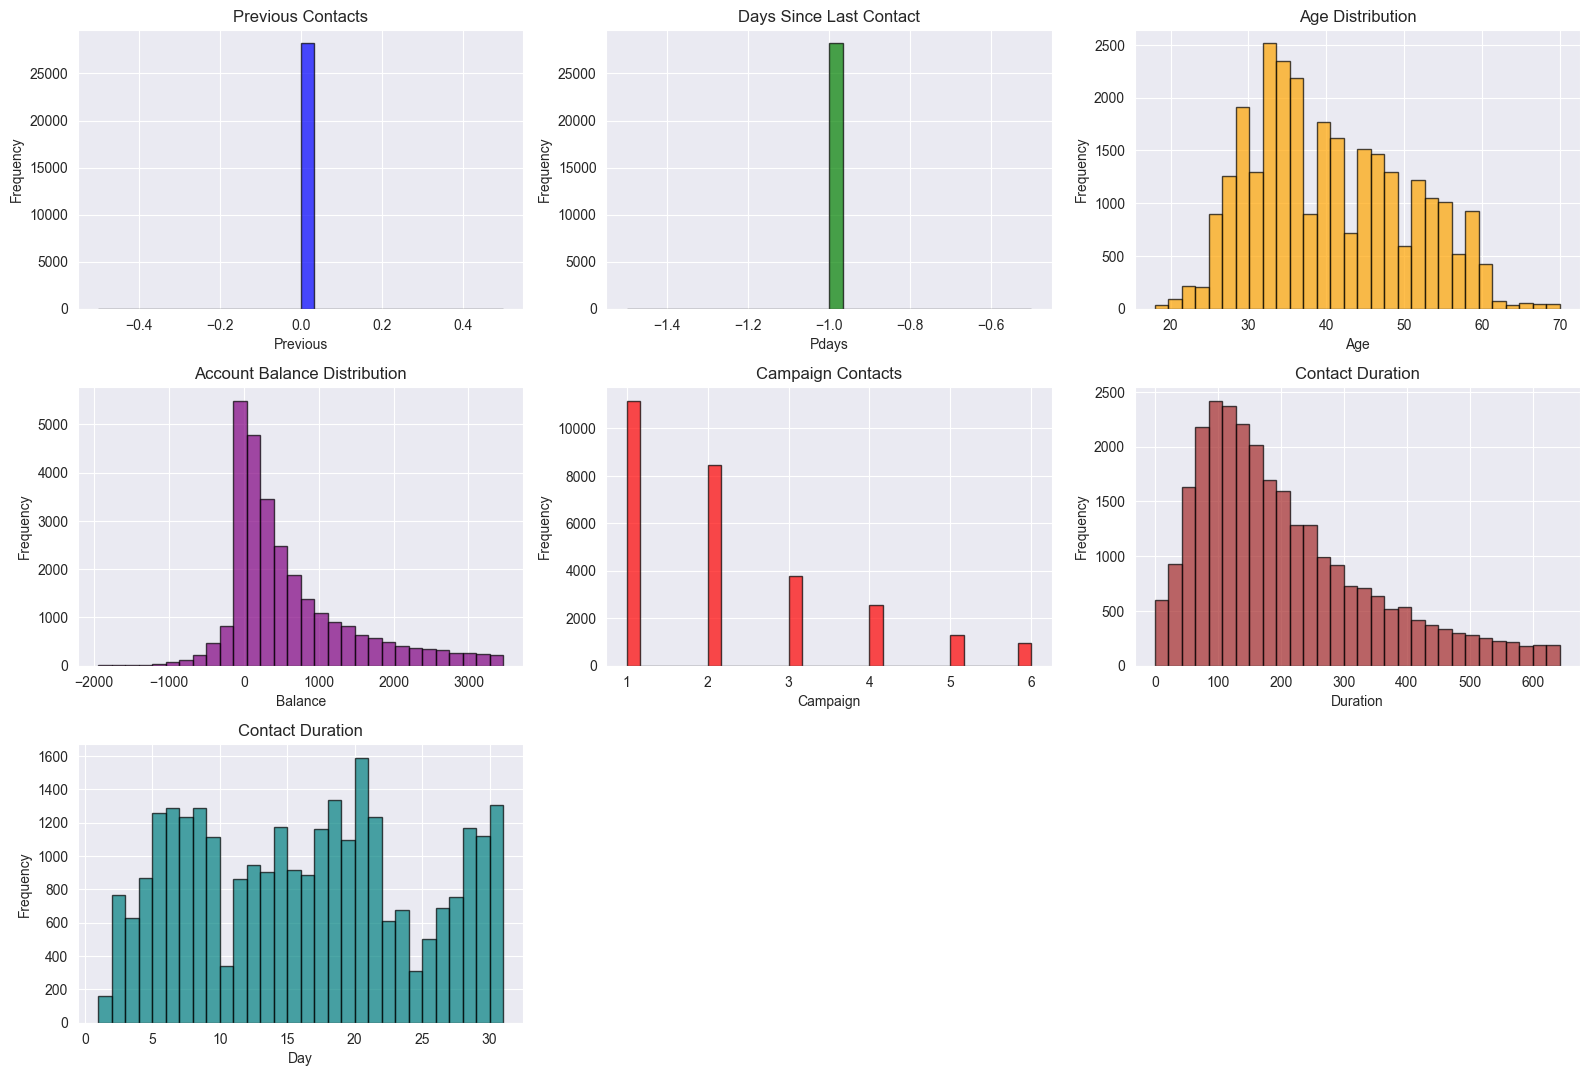

In [52]:

# Create subplots
plt.figure(figsize=(16, 14))  # Adjust figure size for better layout

# Histogram for 'previous'
plt.subplot(4, 3, 1)  # (rows, columns, index)
plt.hist(independent["previous"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Previous Contacts')
plt.xlabel('Previous')
plt.ylabel('Frequency')

# Histogram for 'pdays'
plt.subplot(4, 3, 2)
plt.hist(independent["pdays"], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Days Since Last Contact')
plt.xlabel('Pdays')
plt.ylabel('Frequency')

# Histogram for 'age'
plt.subplot(4, 3, 3)
plt.hist(independent["age"], bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'balance'
plt.subplot(4, 3, 4)
plt.hist(independent["balance"], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Account Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Histogram for 'campaign'
plt.subplot(4, 3, 5)
plt.hist(independent["campaign"], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Campaign Contacts')
plt.xlabel('Campaign')
plt.ylabel('Frequency')

# Histogram for 'duration'
plt.subplot(4, 3, 6)
plt.hist(independent["duration"], bins=30, color='brown', alpha=0.7, edgecolor='black')
plt.title('Contact Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Histogram for 'duration'
plt.subplot(4, 3, 7)
plt.hist(independent["day"], bins=30, color='teal', alpha=0.7, edgecolor='black')
plt.title('Contact Duration')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [53]:
# drop "previous" and "pdays" features due to limited variability
independent.drop(['previous', 'pdays'], axis=1, inplace=True)

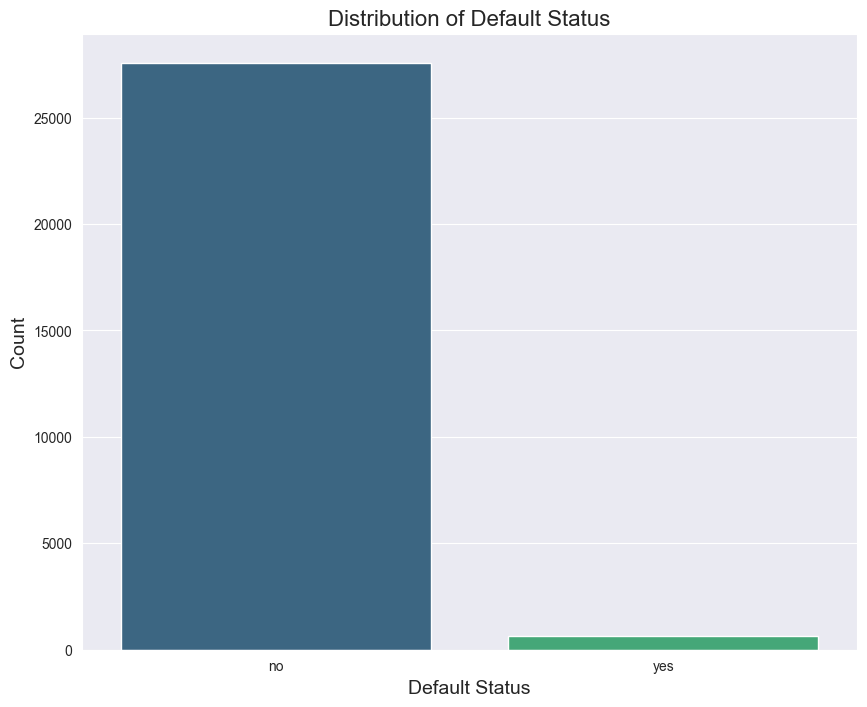

In [54]:
plt.figure(figsize=(10, 8))
sns.countplot(x="default", hue="default", data=independent, palette='viridis')
plt.xlabel("Default Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Default Status", fontsize=16)
plt.show()

In [55]:
# drop “default” feature  due to its extreme imbalance
independent.drop(["default"], axis=1, inplace=True )

In [56]:
# drop "day" due to typically not significant compared to month or duration
independent.drop(["day"], axis=1, inplace=True)

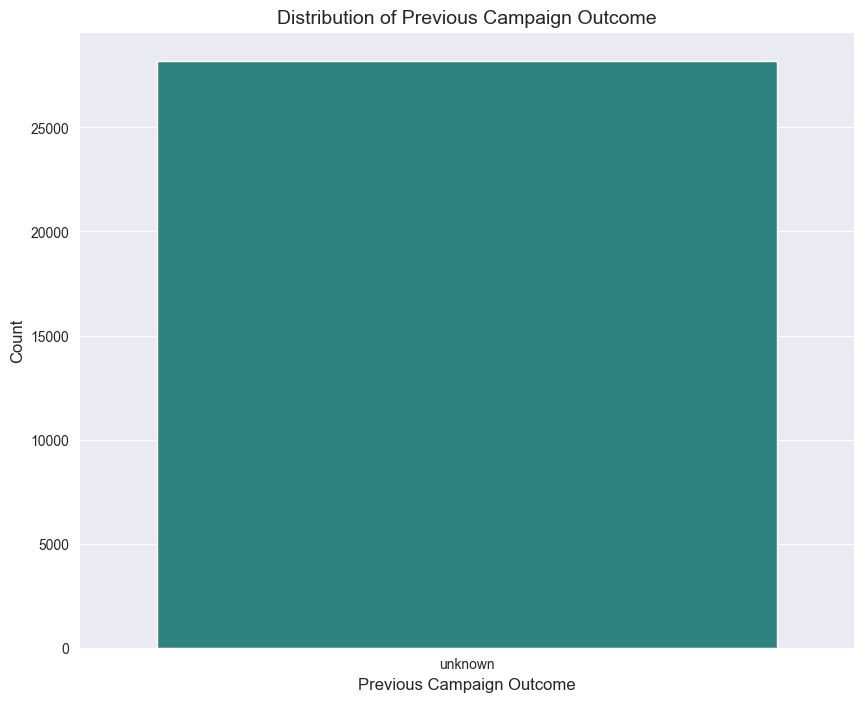

In [57]:
plt.figure(figsize=(10, 8))
sns.countplot(x="poutcome", hue="poutcome", data=independent, palette='viridis')
plt.xlabel("Previous Campaign Outcome", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Previous Campaign Outcome", fontsize=14)
plt.show()

In [58]:
# drop "poutcome" because it has more unknown values
independent.drop(["poutcome"], axis=1, inplace=True)

In [59]:
# display independent variables after drop unnecessary features
independent

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign
0,58,management,married,tertiary,2143,yes,no,unknown,may,261,1
1,44,technician,single,secondary,29,yes,no,unknown,may,151,1
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,may,76,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,may,92,1
4,33,unknown,single,unknown,1,no,no,unknown,may,198,1
...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,nov,333,2
45202,34,admin.,single,secondary,557,no,no,cellular,nov,224,1
45203,23,student,single,tertiary,113,no,no,cellular,nov,266,1
45205,25,technician,single,secondary,505,no,yes,cellular,nov,386,2


# Data Transformation 

## Categorical data transform

In [60]:
# import library for encoding
from sklearn.preprocessing import OneHotEncoder

In [61]:
categorical_features = independent.select_dtypes(include=['object']).columns
numerical_features = independent.select_dtypes(include=['number']).columns

In [62]:
categorical_features

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month'], dtype='object')

In [63]:
# one-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False)

In [64]:
# transform categorical features
encoded_categorical = encoder.fit_transform(independent[categorical_features])

In [65]:
# convert encoded categorical data to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

In [66]:
encoded_categorical_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Target/dependant variable transform

In [67]:
dependent

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [68]:
# Replace "yes" with 1 and "no" with 0
dependent = dependent.replace({"yes": 1, "no": 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21712\2879337024.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dependent = dependent.replace({"yes": 1, "no": 0})


In [69]:
dependent

0        0
1        0
2        0
3        0
4        0
        ..
45198    0
45202    1
45203    1
45205    1
45209    0
Name: y, Length: 28193, dtype: int64

# Numerical data normalization

In [70]:
# normalization of numerical features using MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [71]:
# instantiate the scaler
scaler = StandardScaler()

In [72]:
# scaling the numerical columns
numeric = scaler.fit_transform(independent[numerical_features])

In [73]:
# convert scaled numerical data to a DataFrame
numeric_df = pd.DataFrame(numeric, columns=numerical_features)

In [74]:
numeric_df

,age,balance,duration,campaign
0,1.783264,1.846693,0.399405,-0.886761
1,0.366880,-0.694369,-0.390158,-0.886761
2,-0.745993,-0.726823,-0.928496,-0.886761
3,0.670391,1.081009,-0.813650,-0.886761
4,-0.745993,-0.728025,-0.052799,-0.886761
...,...,...,...,...
28188,-0.341312,0.987251,0.916210,-0.141391
28189,-0.644823,-0.059705,0.133825,-0.886761
28190,-1.757696,-0.593400,0.435294,-0.886761
28191,-1.555355,-0.122209,1.296635,-0.141391


### Combined preprocessed categorical and numerical features

In [75]:
# Combine encoded categorical and scaled numerical features into a single dataset
independent = pd.concat([encoded_categorical_df, numeric_df], axis=1)

In [76]:
independent

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,duration,campaign
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.783264,1.846693,0.399405,-0.886761
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.366880,-0.694369,-0.390158,-0.886761
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.745993,-0.726823,-0.928496,-0.886761
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.670391,1.081009,-0.813650,-0.886761
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.745993,-0.728025,-0.052799,-0.886761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.341312,0.987251,0.916210,-0.141391
28189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.644823,-0.059705,0.133825,-0.886761
28190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.757696,-0.593400,0.435294,-0.886761
28191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.555355,-0.122209,1.296635,-0.141391


# Data Imbalance Problem Handling

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [79]:
# Resample the dataset
x_resampled, y_resampled = smote.fit_resample(independent, dependent)

In [80]:
# Confirm resampling
print("Original dataset shape:",)
print(pd.Series(dependent).value_counts())

print("\nResampled dataset shape:",)
print( pd.Series(y_resampled).value_counts())

Original dataset shape:
y
0    26594
1     1599
Name: count, dtype: int64

Resampled dataset shape:
y
0    26594
1    26594
Name: count, dtype: int64


# Train test split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# spit dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [83]:
x_train.shape

(42550, 42)

In [200]:
x_test.shape

(10638, 42)

# Random forest

### Hyperparameter tuning and model training

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [86]:
# initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [87]:
# parameter grid for hyperparameter tuning
param_distributions_RF = {
    'n_estimators': list(range(10, 201)),  # List of integers from 10 to 200
    'max_depth': list(range(5, 21)),      # List of integers from 5 to 20
    'min_samples_split': list(range(5, 21)),      # Common split values
    'min_samples_leaf': list(range(1, 11)),        # Common leaf sizes
    'max_features': ['sqrt', 'log2', None],  # Feature selection strategies
}

In [88]:
# RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions_RF,
    n_iter=10, 
    scoring='accuracy',
    cv=3,  
    random_state=42,
    n_jobs=-1 
)

In [89]:
# fit randomSearch
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]},
                   random_state=42, scoring='accuracy')

In [90]:
# best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 65, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 17}


In [91]:
# randomForest classifier with optimal parameters
rf_model_rs = RandomForestClassifier(
    n_estimators=65,        # Number of trees in the forest
    max_depth=17,           # Maximum depth of each tree
    max_features="sqrt",    # Correct feature selection strategy
    min_samples_split=6,    # Minimum samples required to split a node
    min_samples_leaf=2,     # Minimum samples required to be a leaf node
    random_state=42         # Random state for reproducibility
)

In [92]:
# fit model 
rf_model_rs.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=65, random_state=42)

### Model evaluation and accuracy testing

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [168]:
# get predicted y values for testing data
y_predict_rf = rf_model_rs.predict(x_test)

In [199]:
# accuracy score
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9626


In [198]:
# precision score
precision_rf = precision_score(y_test, y_predict_rf)
print(f"Random Forest Precision Score: {precision_rf:.4f}")

Random Forest Precision Score: 0.9494


In [197]:
# recall score
recall_rf = recall_score(y_test, y_predict_rf)
print(f"Random Forest Recall Score: {recall_rf:.4f}")

Random Forest Recall Score: 0.9780


In [196]:
# f1-score
f1_rf = f1_score(y_test, y_predict_rf)
print(f"Random Forest F1-Score: {f1_rf:.4f}")

Random Forest F1-Score: 0.9635


In [194]:
# classification report
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_predict_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5269
           1       0.95      0.98      0.96      5369

    accuracy                           0.96     10638
   macro avg       0.96      0.96      0.96     10638
weighted avg       0.96      0.96      0.96     10638



In [192]:
# confusion metrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict_rf))

Random Forest Confusion Matrix:
[[4989  280]
 [ 118 5251]]


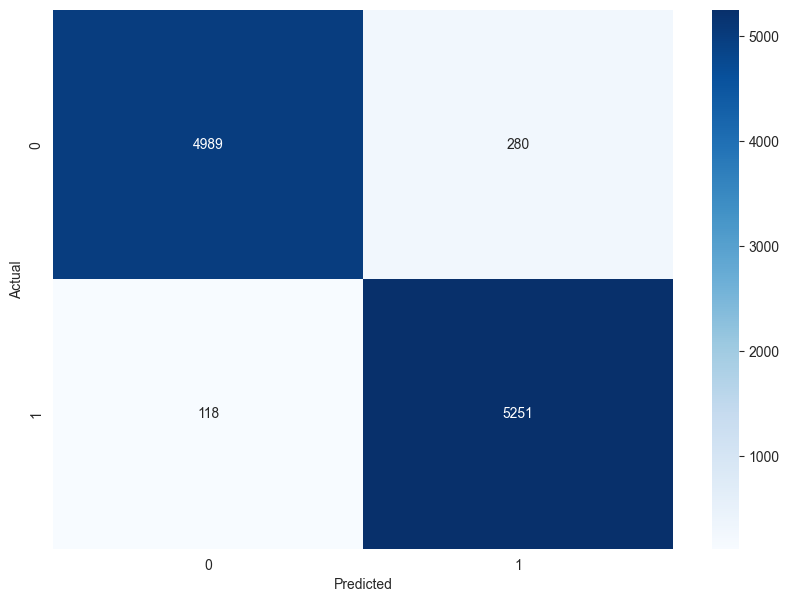

In [182]:
# plot confusion metrix
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [228]:
y_predict_proba_rf = rf_model_rs.predict_proba(x_test)

In [229]:
roc_auc_rf = roc_auc_score(y_test, y_predict_proba_rf)
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")

ValueError: y should be a 1d array, got an array of shape (10638, 2) instead.

In [227]:
fpr_rf, tpr_rf , _= roc_curve(y_test,y_predict_proba_rf[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

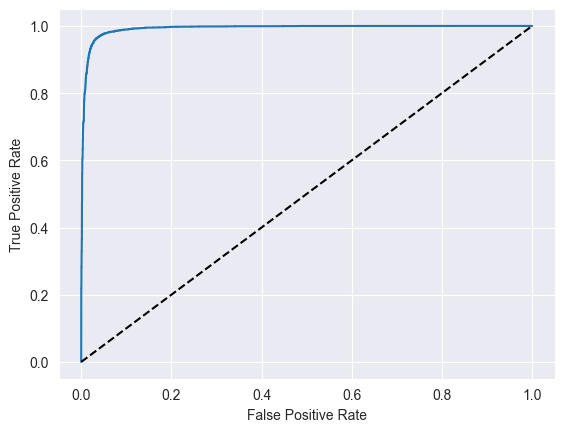

In [167]:
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Neural network

### Hyperparameter tuning and model training

In [127]:
import tensorflow as tf
import random

In [128]:
# shape of dataset
x_train.shape[1]

42

In [135]:
# options for select optimal parameters
num_neurons_layer1_options = [64, 128, 256]
num_neurons_layer2_options = [32, 64, 128]
dropout_rate_options = [0.2, 0.3, 0.5]
learning_rate_options = [0.001, 0.0005, 0.0001]

In [136]:
# initially set parameters as null
best_val_accuracy = 0
best_params = None

In [137]:
# number of trials
num_trials = 20

In [144]:
# randomly find the best parameters up to the number of trials
for trial in range(num_trials):
    print(f"\n=== Trial {trial + 1} ===")
    
    # randomly select hyperparameters
    num_neurons_layer1 = random.choice(num_neurons_layer1_options)
    num_neurons_layer2 = random.choice(num_neurons_layer2_options)
    dropout_rate = random.choice(dropout_rate_options)
    learning_rate = random.choice(learning_rate_options)
    
    print(f"Chosen hyperparameters: \n"
          f"Layer 1 neurons: {num_neurons_layer1}, \n"
          f"Layer 2 neurons: {num_neurons_layer2}, \n"
          f"Dropout rate: {dropout_rate}, \n"
          f"Learning rate: {learning_rate}")
    
    # build and compile the model
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(42,)),
        tf.keras.layers.Dense(num_neurons_layer1, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_neurons_layer2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    # train the model
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0)
    
    # get validation accuracy
    val_accuracy = max(history.history['val_accuracy'])
    print(f"Validation Accuracy: {val_accuracy}")
    
    # update the best hyperparameters if performance improves
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = {
            "num_neurons_layer1": num_neurons_layer1,
            "num_neurons_layer2": num_neurons_layer2,
            "dropout_rate": dropout_rate,
            "learning_rate": learning_rate
        }

# Print the best hyperparameters
print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Validation Accuracy: {best_val_accuracy}")



=== Trial 1 ===
Chosen hyperparameters: 
Layer 1 neurons: 64, 
Layer 2 neurons: 64, 
Dropout rate: 0.5, 
Learning rate: 0.0005
Validation Accuracy: 0.8980023264884949

=== Trial 2 ===
Chosen hyperparameters: 
Layer 1 neurons: 64, 
Layer 2 neurons: 32, 
Dropout rate: 0.5, 
Learning rate: 0.0005
Validation Accuracy: 0.8974148035049438

=== Trial 3 ===
Chosen hyperparameters: 
Layer 1 neurons: 128, 
Layer 2 neurons: 128, 
Dropout rate: 0.3, 
Learning rate: 0.0005
Validation Accuracy: 0.9247943758964539

=== Trial 4 ===
Chosen hyperparameters: 
Layer 1 neurons: 256, 
Layer 2 neurons: 128, 
Dropout rate: 0.5, 
Learning rate: 0.0001
Validation Accuracy: 0.8903642892837524

=== Trial 5 ===
Chosen hyperparameters: 
Layer 1 neurons: 64, 
Layer 2 neurons: 64, 
Dropout rate: 0.5, 
Learning rate: 0.001
Validation Accuracy: 0.9090481996536255

=== Trial 6 ===
Chosen hyperparameters: 
Layer 1 neurons: 256, 
Layer 2 neurons: 32, 
Dropout rate: 0.3, 
Learning rate: 0.0001
Validation Accuracy: 0.88824

In [145]:
# train optimal model with best parameters
optimal_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(42,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    
])

In [146]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [147]:
optimal_model.compile(optimizer=optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [148]:
optimal_history = optimal_model.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=32,
                                    validation_split=0.2,)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8207 - loss: 0.4052 - val_accuracy: 0.8824 - val_loss: 0.2863
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8777 - loss: 0.2965 - val_accuracy: 0.9043 - val_loss: 0.2467
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8961 - loss: 0.2606 - val_accuracy: 0.9162 - val_loss: 0.2246
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9112 - loss: 0.2363 - val_accuracy: 0.9156 - val_loss: 0.2185
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9162 - loss: 0.2191 - val_accuracy: 0.9288 - val_loss: 0.1959
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9244 - loss: 0.1996 - val_accuracy: 0.9315 - val_loss: 0.1795
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9255 - loss: 0.1910 - val_accuracy: 0.9360 - val_loss: 0.1748
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9289 - loss: 0.1861 - 

### Model evaluation and accuracy testing

In [206]:
y_predict_nn = optimal_model.predict(x_test)
# Assuming binary classification
y_predict_nn = (y_predict_nn >= 0.5).astype(int)


333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [207]:
# accuracy score
accuracy_nn = accuracy_score(y_test, y_predict_nn)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9626


In [208]:
# precision score
precision_nn = precision_score(y_test, y_predict_nn)
print(f"Random Forest Precision Score: {precision_nn:.4f}")

Random Forest Precision Score: 0.9178


In [209]:
# recall score
recall_nn = recall_score(y_test, y_predict_nn)
print(f"Random Forest Recall Score: {recall_nn:.4f}")

Random Forest Recall Score: 0.9726


In [210]:
# f1-score
f1_nn = f1_score(y_test, y_predict_nn)
print(f"Random Forest F1-Score: {f1_nn:.4f}")

Random Forest F1-Score: 0.9444


In [211]:
# classification report
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_predict_nn))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5269
           1       0.92      0.97      0.94      5369

    accuracy                           0.94     10638
   macro avg       0.94      0.94      0.94     10638
weighted avg       0.94      0.94      0.94     10638



In [212]:
# confusion metrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict_nn))

Random Forest Confusion Matrix:
[[4801  468]
 [ 147 5222]]


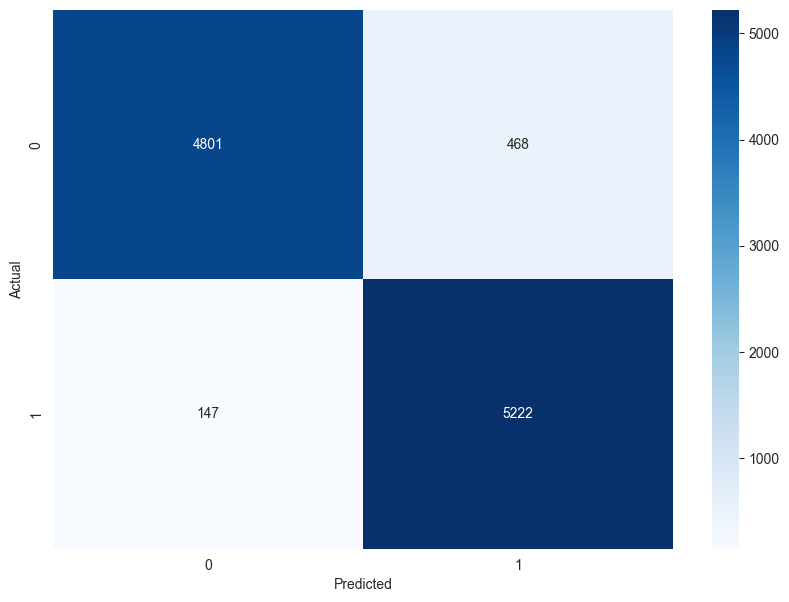

In [215]:
# plot confusion metrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_predict_nn), annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [219]:
y_predict_proba_nn = optimal_model.predict(x_test)[:, 0]
roc_auc_nn = roc_auc_score(y_test, y_predict_proba_nn)
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")

333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Random Forest ROC-AUC: 0.99


In [221]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_predict_proba_nn[:, 0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

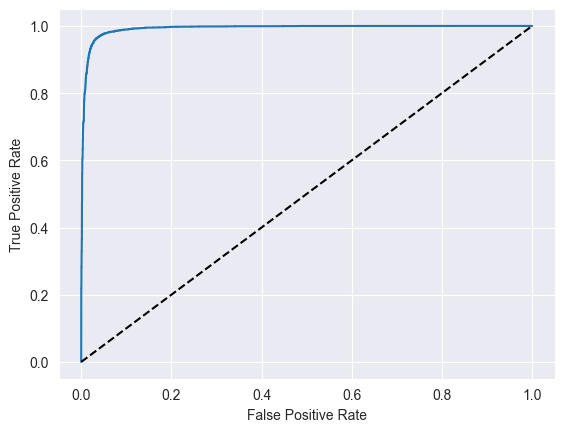

In [220]:
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

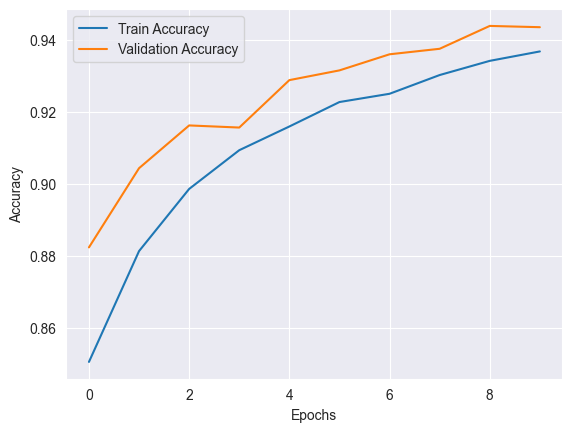

In [149]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(optimal_history.history['accuracy'], label='Train Accuracy')
plt.plot(optimal_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
